<a href="https://colab.research.google.com/github/dp2292/CP02-Data-Alchemists/blob/main/CP02_Data_Alchemists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IT-496 Introduction To Data Mining

# Course Project - 02: Data Preprocessing, EDA and Classification Analysis
\
Dataset-5: Credit Risk Analysis \
Team 23: Data Alchemists

---

# Section 1 : Loading the data into dataframe

* ## Loading data.csv into gdrive


In [ ]:
!mkdir data

In [ ]:
!cd data

In [ ]:
!gdown --id 1xpLWnqT0hi0wqo6qSbnzmMJkbT0PHWw8

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xpLWnqT0hi0wqo6qSbnzmMJkbT0PHWw8
To: /content/data.csv
100% 333M/333M [00:04<00:00, 71.1MB/s]


In [ ]:
!mv data.csv data/data.csv

* ## Loading libraries and adding data into dataframe

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_backup = pd.read_csv('data/data.csv', low_memory=True)

<ipython-input-6-67d65fbacb4c>:1: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data_backup = pd.read_csv('data/data.csv', low_memory=True)


In [ ]:
df = data_backup.copy()

df.shape

(855969, 73)

* ## Dataframe Description

In [ ]:
print(df.dtypes)

id                    int64
member_id             int64
loan_amnt             int64
funded_amnt           int64
funded_amnt_inv     float64
                     ...   
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
default_ind           int64
Length: 73, dtype: object


In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [ ]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

Total Number of NULL values in different Columns

In [ ]:
df.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

In [ ]:
print(f'Total number of NULL values in the Dataframe is {df.isnull().sum().sum()}')

Total number of NULL values in the Dataframe is 17464593


# Section 2: EDA

## Dataframe distribution

In [ ]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


## Countplots

### Countplot for verification status

<Axes: xlabel='verification_status', ylabel='count'>

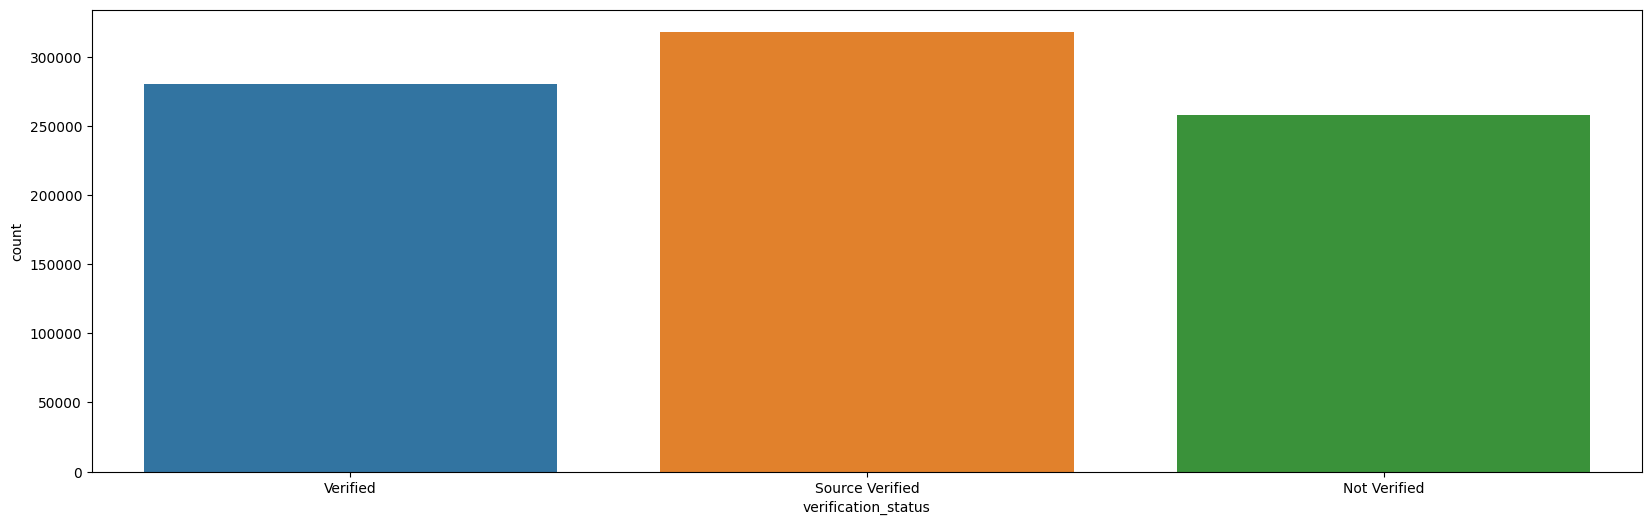

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(df, x="verification_status")

The above graph states a visual representation of the number of instances of different verification categories, majority of them being source verified.

### Countplot for address state

<Axes: xlabel='addr_state', ylabel='count'>

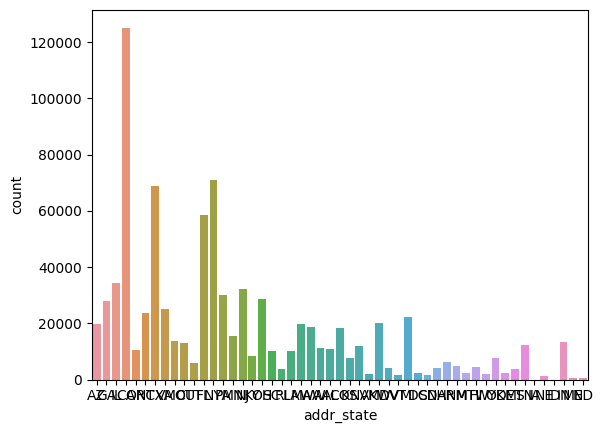

In [ ]:
sns.countplot(df,x="addr_state")

The countplot of states shows that maximum number of applications were from California followed by New York and Texas.

### Countplot for Loan grade

<Axes: xlabel='grade', ylabel='count'>

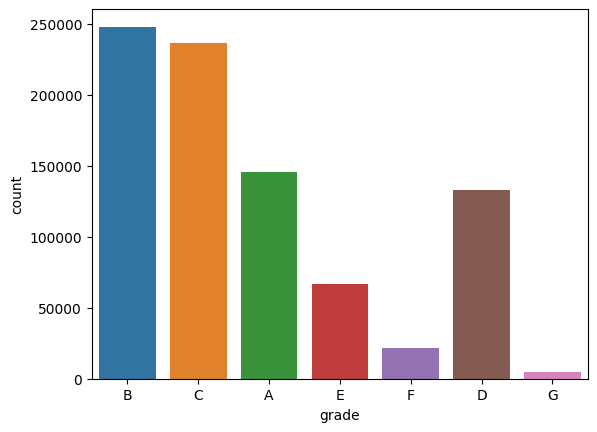

In [ ]:
sns.countplot(df,x="grade")

The countplot of Grades show maximum loans applied for falls under the grade B and C respectively.



### Countplot for Loan term

<Axes: xlabel='term', ylabel='count'>

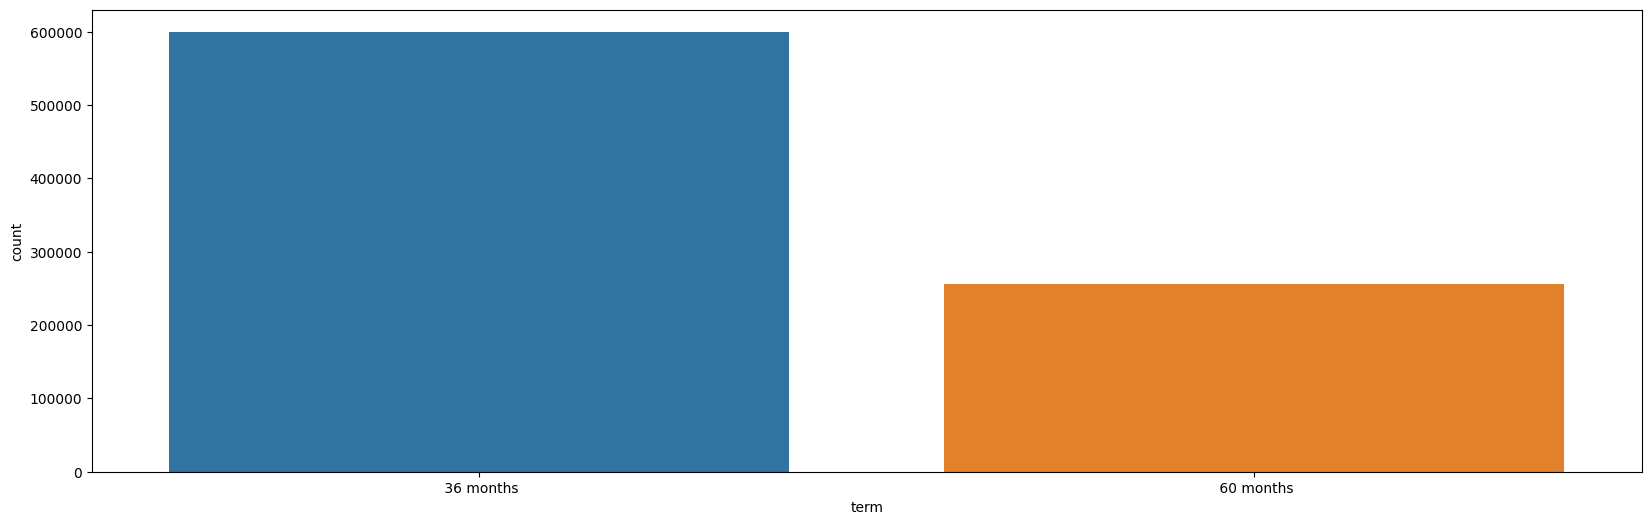

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(df,x="term")

The given countplot on term shows that major loans are for duration of 36 months and there is an imbalance in loan term distribution.

### Countplot for Loan purpose

<Axes: xlabel='purpose', ylabel='count'>

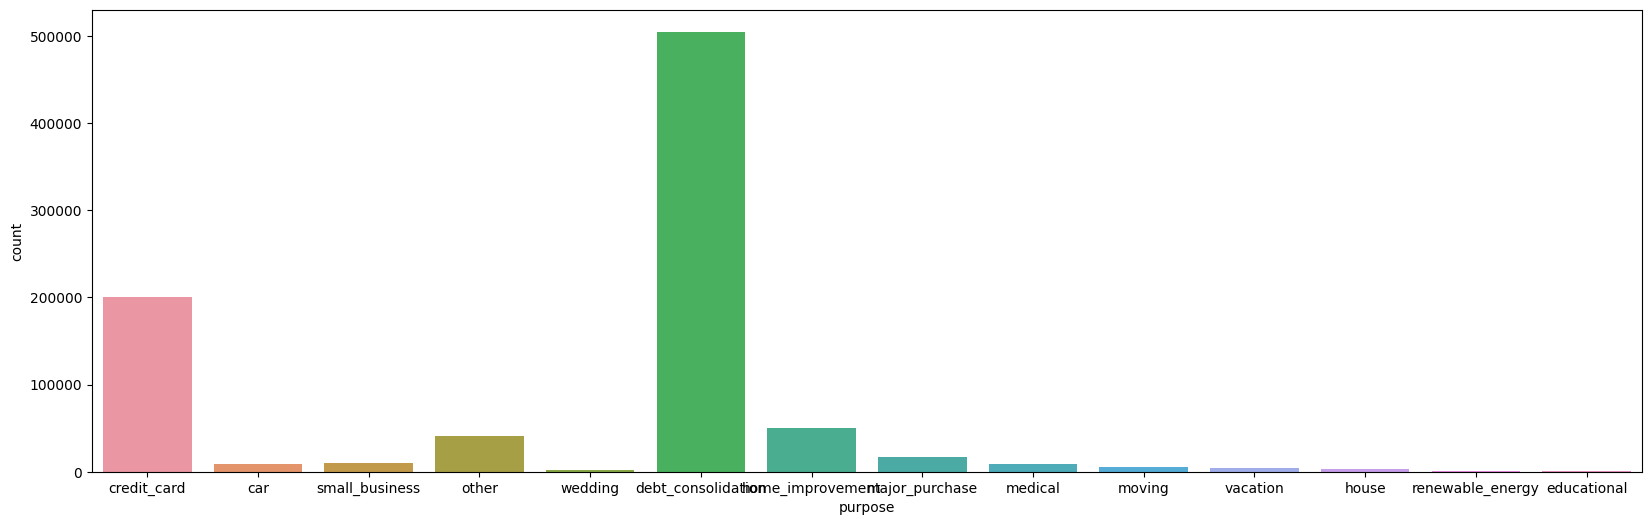

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(df,x="purpose")

The above countplot shows that majority of loans were asked for debt consolidation purposes.

## Bar Graphs

### Barplot for Loan grade distribution vs interest rate

<Axes: xlabel='grade', ylabel='int_rate'>

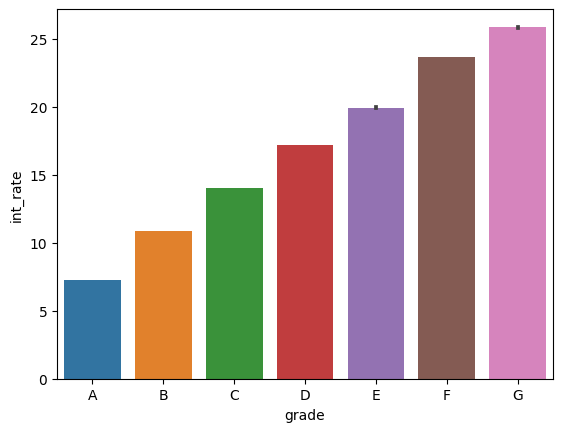

In [ ]:
sns.barplot(x=df['grade'], y=df['int_rate'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

We can observe that lower the loan grade 'A-G', more will be the interest rate charged on the loan due to the risk involved of defaulting.

### Barplot for Loan Term vs interest rate

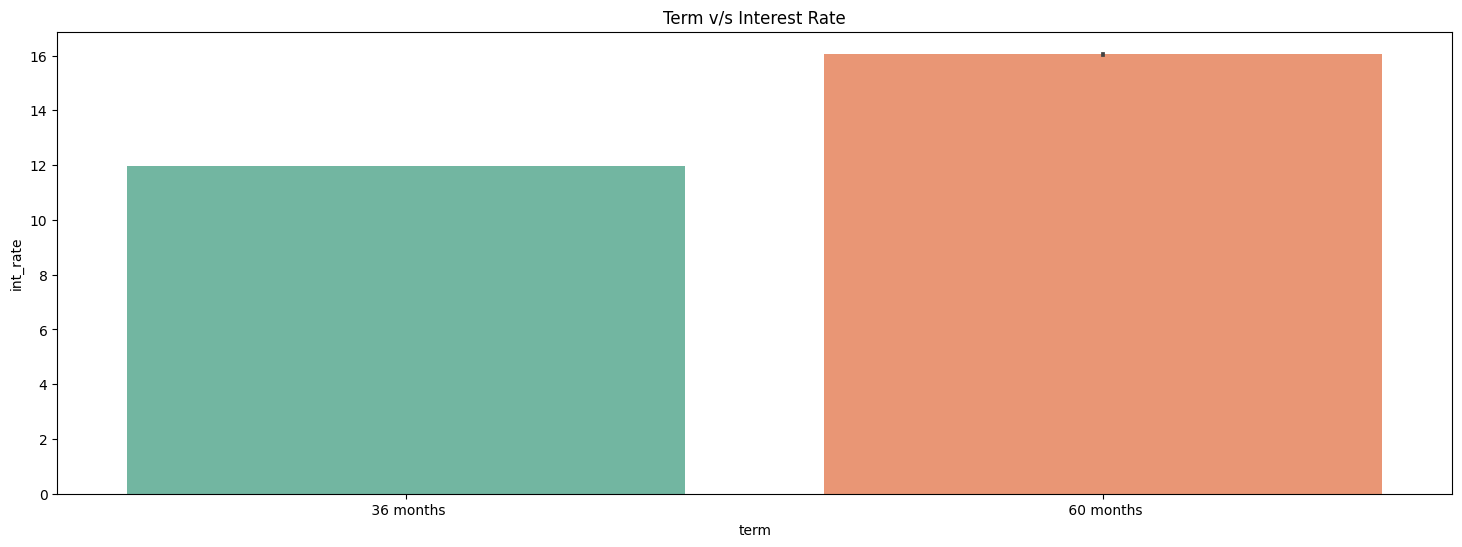

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x = "term", y = "int_rate",data=df, palette= sns.color_palette("Set2")).set(
    title="Term v/s Interest Rate");

The interest rate also increases with the increase in term, it is more for 60 months term than 36 months.

### Barplot for Loan purpose vs Annual Income

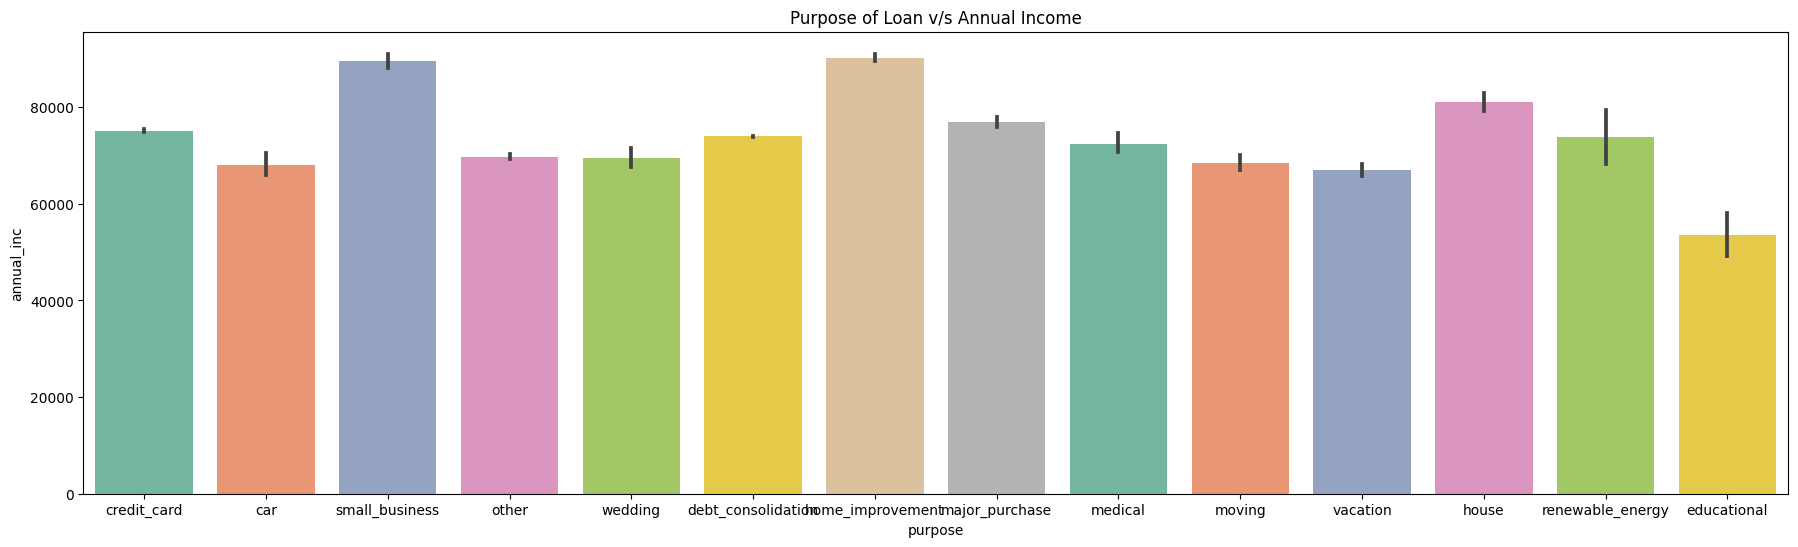

In [ ]:
plt.figure(figsize=(22,6))
sns.barplot(x = "purpose", y = "annual_inc",data=df, palette= sns.color_palette("Set2")).set(
    title="Purpose of Loan v/s Annual Income");

People with higher annual income apply for loans for starting small businesses or home rennovations. While educational loan is more common with people having lower annual income.

## Boxplots

### Boxplot for Loan Amount, Annual Income, Interest Rates, Dept-to-Income Ratio(DTI)

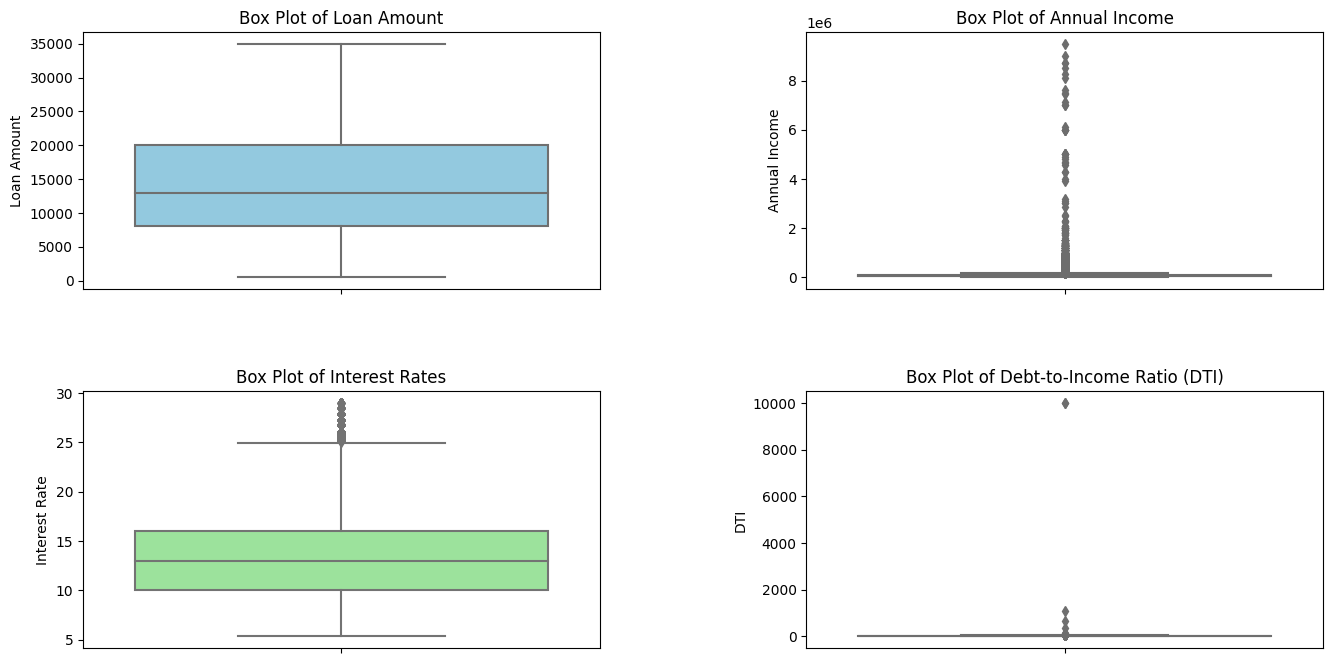

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Loan Amount
sns.boxplot(data=df, y='loan_amnt', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Box Plot of Loan Amount')
axes[0, 0].set_ylabel('Loan Amount')

# Annual Income
sns.boxplot(data=df, y='annual_inc', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Box Plot of Annual Income')
axes[0, 1].set_ylabel('Annual Income')

# Interest Rates
sns.boxplot(data=df, y='int_rate', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Box Plot of Interest Rates')
axes[1, 0].set_ylabel('Interest Rate')

# Debt-to-Income Ratio (DTI)
sns.boxplot(data=df, y='dti', ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Box Plot of Debt-to-Income Ratio (DTI)')
axes[1, 1].set_ylabel('DTI')

plt.show()



1.   Box Plot of Loan Amount (Top Left):

  The boxplot for "Loan Amount" shows the distribution of loan amounts.
The box represents the interquartile range (IQR), with the median (middle line in the box) indicating the central tendency.
Outliers are depicted as individual points outside the whiskers.
You can see the spread and variability in loan amounts. It helps identify the range of typical loan sizes and the presence of outliers.
2.  Box Plot of Annual Income (Top Right):
  
  This boxplot illustrates the distribution of annual income for borrowers.
Similar to the loan amount plot, it shows the IQR, median, and potential outliers.
You can assess the income range of borrowers and identify any exceptionally high or low incomes in the dataset.
3. Box Plot of Interest Rates (Bottom Left):

  The boxplot for "Interest Rates" displays the distribution of interest rates on loans.
It allows you to observe the spread and central tendency of interest rates.
This can be informative for understanding the typical interest rates offered and identifying potential outliers in high or low-interest rates.

4. Box Plot of Debt-to-Income Ratio (DTI) (Bottom Right):

  The boxplot for "Debt-to-Income Ratio" (DTI) reveals the distribution of borrowers' DTI.
DTI is a measure of a borrower's ability to manage debt.
This plot helps you understand the distribution of DTI values, including the median and variability. It can identify borrowers with high DTI ratios.

### Boxplot of Loan Amount vs Purpose

<Axes: xlabel='loan_amnt', ylabel='purpose'>

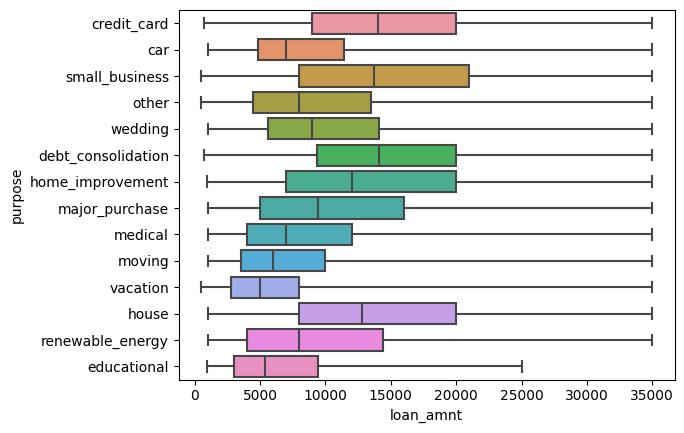

In [ ]:
sns.boxplot(data=df, x="loan_amnt", y="purpose", whis=(0, 100))

This visualization helps us understand how loan amounts are distributed across various loan purposes, which is valuable for making decisions related to lending or analyzing borrowing behavior.

### Boxplot for Inquiries in last 6 months vs Interest rate of loan

<Axes: xlabel='inq_last_6mths', ylabel='int_rate'>

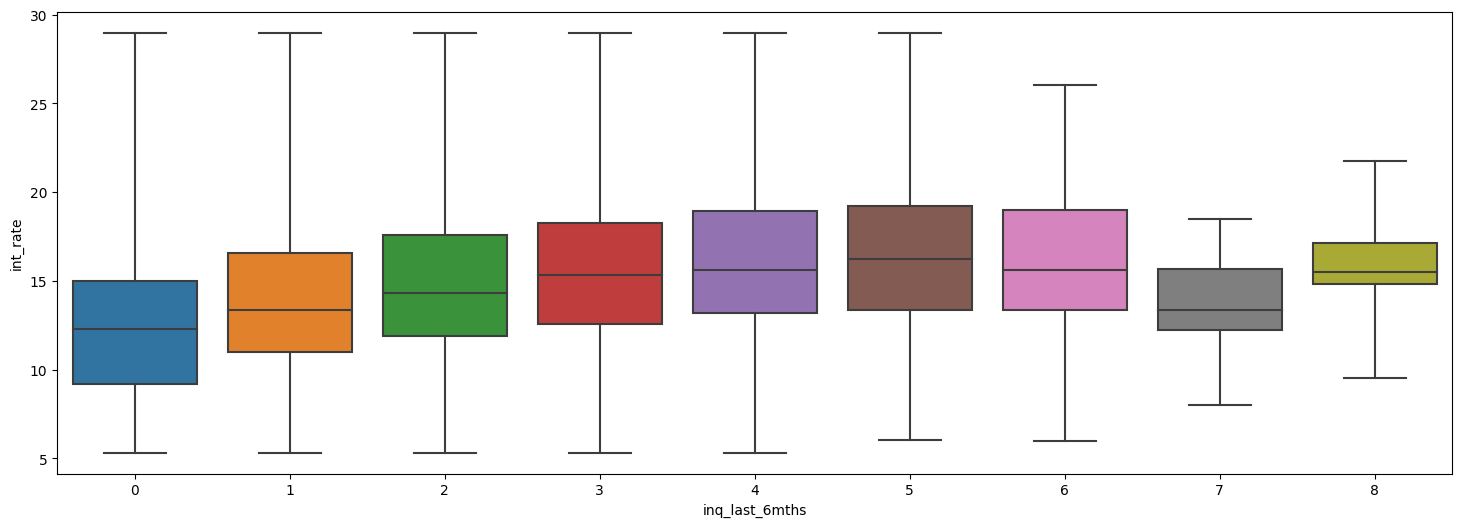

In [ ]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df, x="inq_last_6mths", y="int_rate", whis=(0, 100))

The boxplots allow us to visualize the relationship between the number of inquiries in the last 6 months and interest rates, helping you understand the central tendency, spread, and variability in interest rates within each group of inquiries. This information can be valuable for making lending and credit risk-related decisions.

### Boxplot for Loan Grade vs Interest Rate

<Axes: xlabel='grade', ylabel='int_rate'>

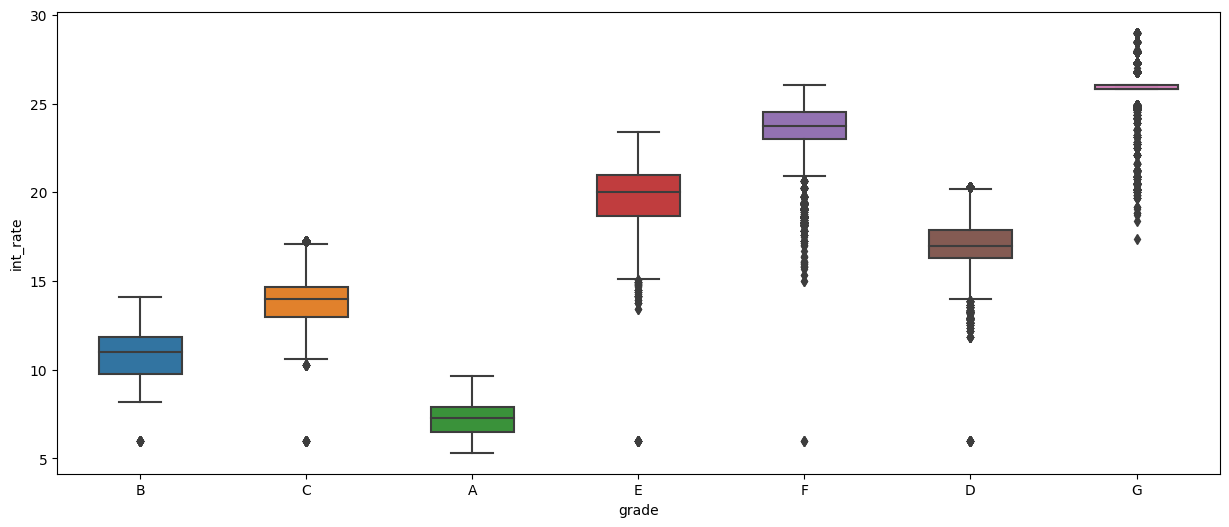

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x="grade", y="int_rate", width=.5)

The boxplots allow us to visually compare the distribution of interest rates for different loan grades, making it easier to understand how interest rates vary with different categories of loan.

### Boxplot for Home Ownership vs Income

Text(0.5, 1.0, 'Income Distribution by Home Ownership')

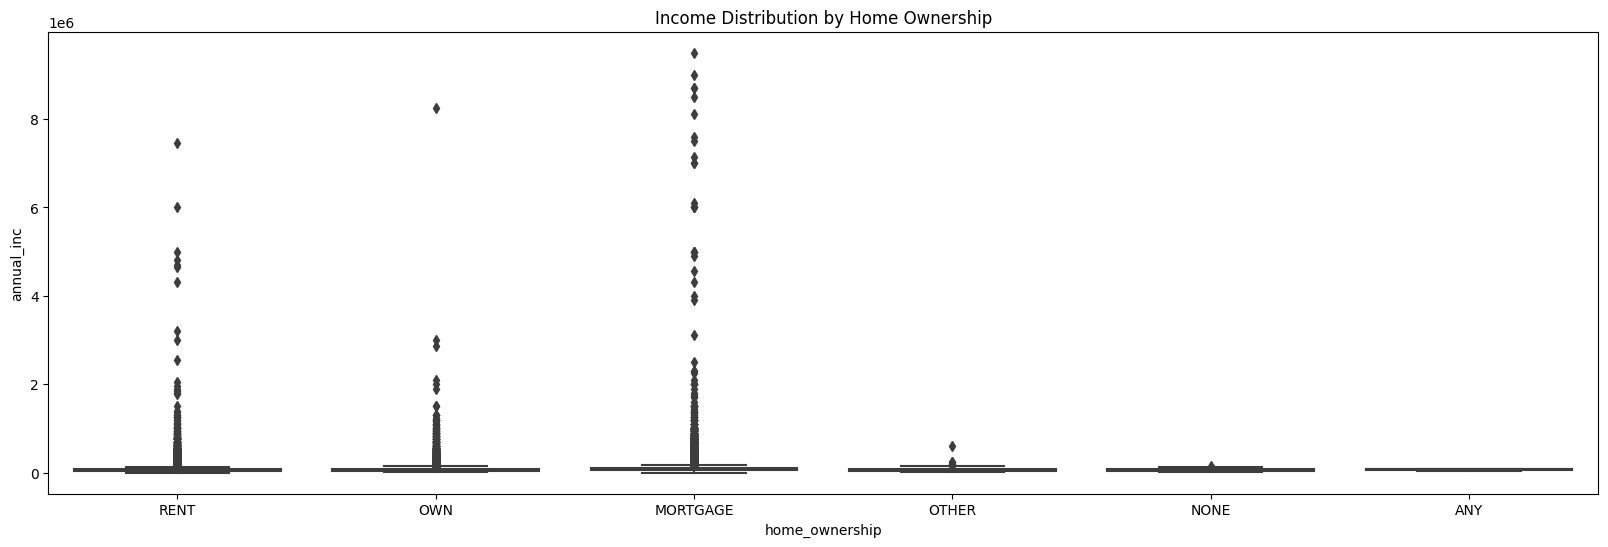

In [ ]:
plt.figure(figsize=(20, 6))
# Income Distribution by Home Ownership
sns.boxplot(data=df, x='home_ownership', y='annual_inc')
plt.title("Income Distribution by Home Ownership")


 The boxplots help us understand how annual income is distributed across various home ownership categories and provide insights into the central tendency, variability, and potential disparities in income within these categories.

### Boxplot for Employment Length vs DTI

Text(0.5, 1.0, 'DTI by Employment Length')

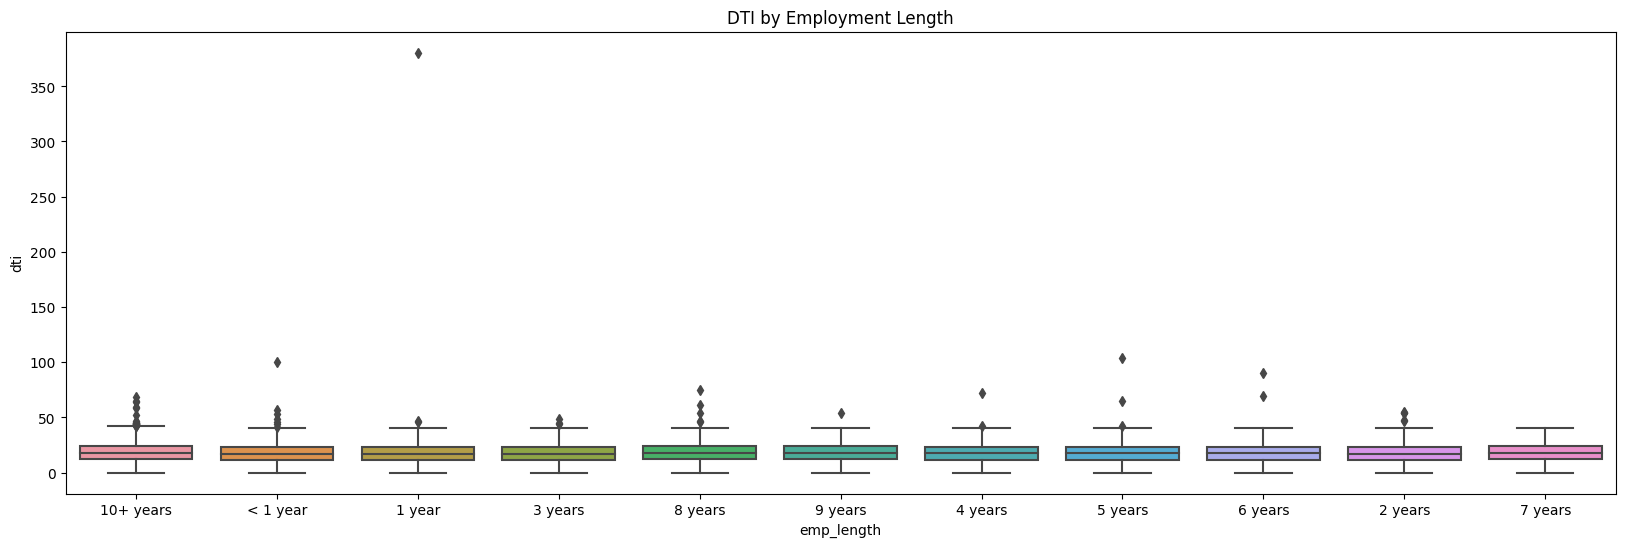

In [ ]:
# Debt-to-Income Ratio (DTI) by Employment Length Box Plot
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='emp_length', y='dti')
plt.title("DTI by Employment Length")


 The boxplot provides a clear visual representation of how the Debt-to-Income Ratio (DTI) is distributed across different employment length categories. It helps us identify trends, variations, and potential outliers, which can be valuable for decision-making.

## Pie-Chart

### Piechart for application types

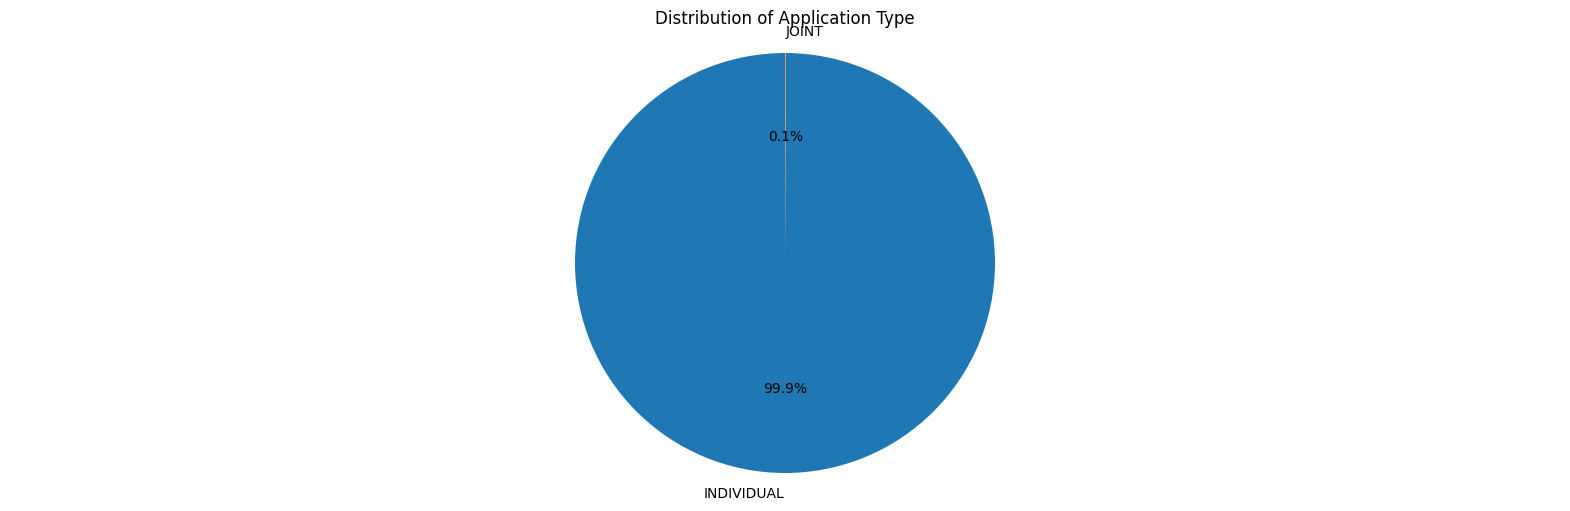

In [ ]:
plt.figure(figsize=(20,6))
app_counts = df['application_type'].value_counts()
plt.pie(app_counts, labels=app_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Application Type')
plt.axis('equal')
plt.show()

The pie-chart shows that only 0.1% of the total loans applied were applied jointly.

### Piechart for purpose

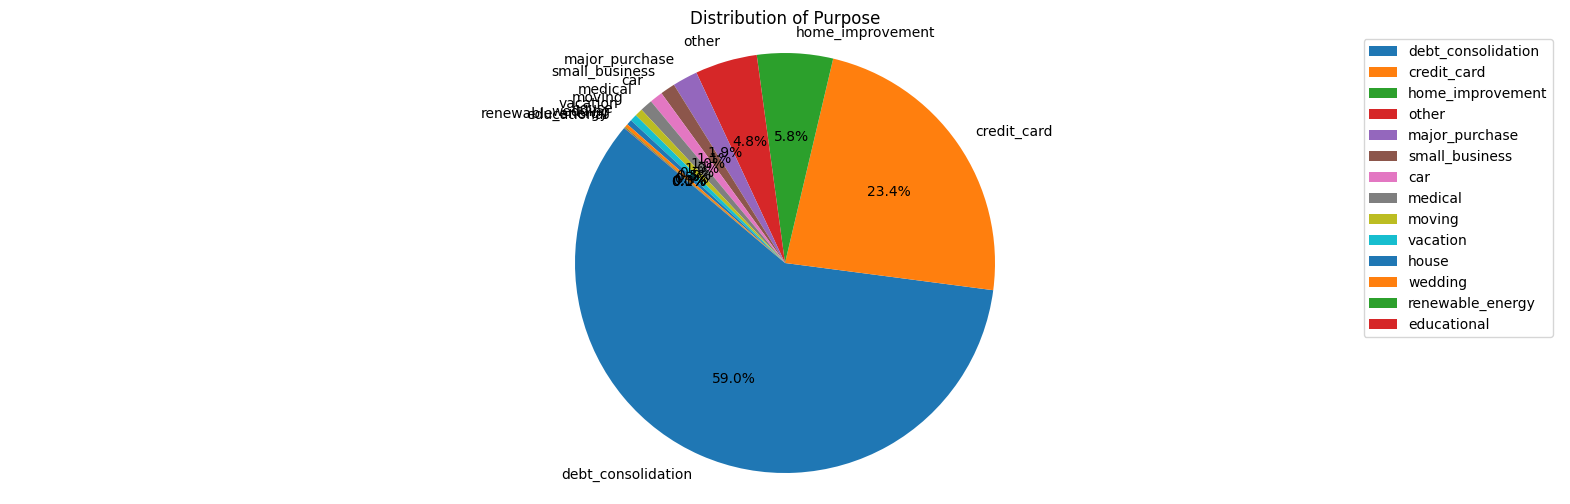

In [ ]:
purpose_counts = df['purpose'].value_counts()
plt.figure(figsize=(20, 6))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purpose')
plt.axis('equal')
plt.legend(purpose_counts.index, loc="best")
plt.show()


The above chart clearly shows that more than 75% loans were either for credit card or for debt consolidation purposes.

### Piecharts for Loan sub grade, Loan grade, Home Ownership, Verification Status

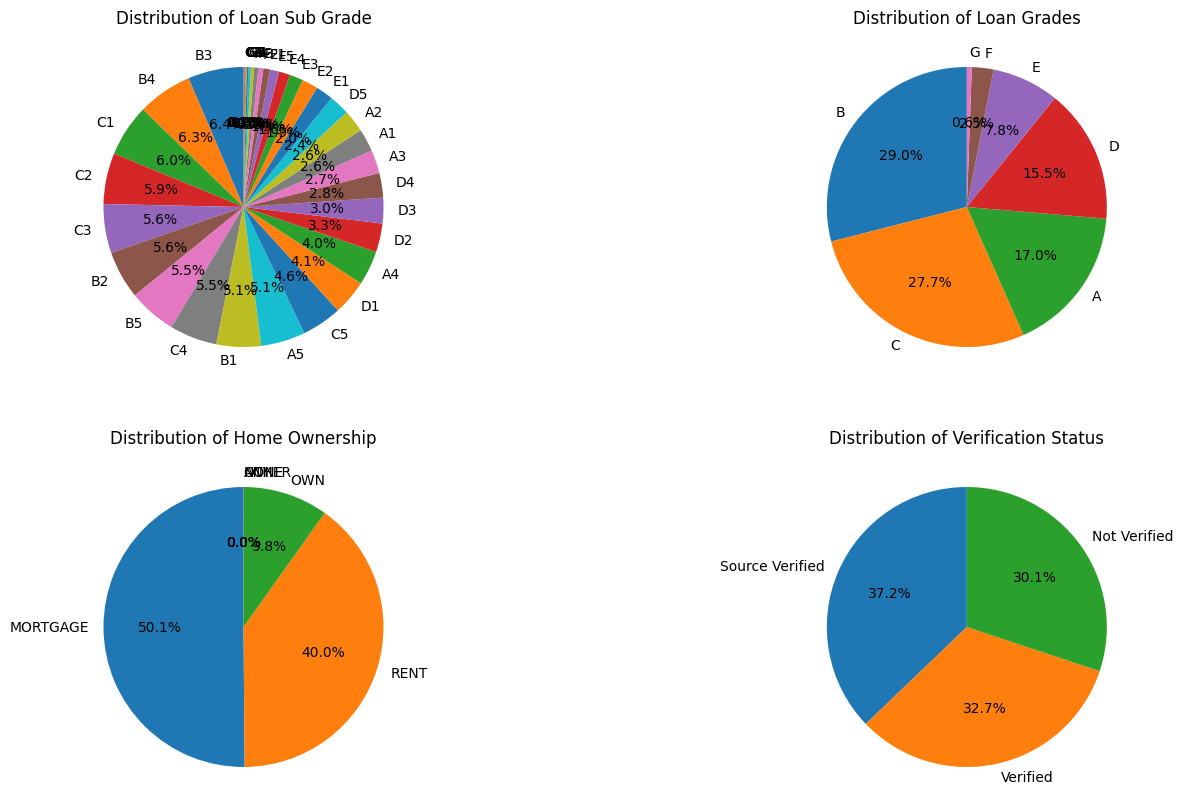

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
plt.subplots_adjust(wspace=0.4)

# Distribution of Loan Sub-Grades
sub_grade_counts = df['sub_grade'].value_counts()
axes[0, 0].pie(sub_grade_counts, labels=sub_grade_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Distribution of Loan Sub Grade')

# Distribution of Loan Grades
grade_counts = df['grade'].value_counts()
axes[0, 1].pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Distribution of Loan Grades')

# Distribution of Home Ownership Status
home_ownership_counts = df['home_ownership'].value_counts()
axes[1, 0].pie(home_ownership_counts, labels=home_ownership_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Distribution of Home Ownership')

# Distribution of Verification Status
verification_status_counts = df['verification_status'].value_counts()
axes[1, 1].pie(verification_status_counts, labels=verification_status_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Distribution of Verification Status')

plt.show()


All the pie-charts visibally show the distribution of the stated quantities relative to an absolute whole.
It helps in understanding the data and analysing the risk.

## Violinplots

### Violin Plot of Loan Amount vs Home Ownership

<Axes: xlabel='loan_amnt', ylabel='home_ownership'>

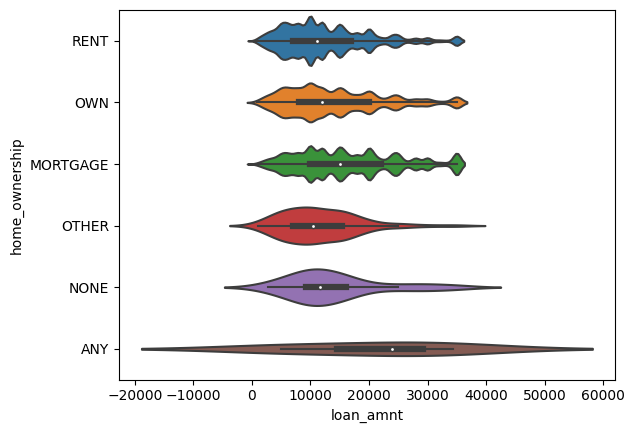

In [ ]:
sns.violinplot(data=df, x="loan_amnt", y="home_ownership")

We obtain the violin plots to visualize the distribution of loan amounts across various categories of home ownership. These plots provide insights into the spread, central tendencies, and shapes of the loan amount distributions for each category. By examining the width, median lines, skewness, and presence of outliers within the violin plots, one can infer how loan amounts are distributed based on different types of home ownership. This visualization aids in comparing loan amount patterns across categories and highlights any variations or trends that may be present in the data.

### Violin Plots for Multiple Columns
1. Term vs Loan Amount
2. Home Ownership vs Annual Income
3. Grade vs Interest Rate
4. Loan Amount by Loan Purpose
5. Grade vs DTI
6. Grade vs Total Payment

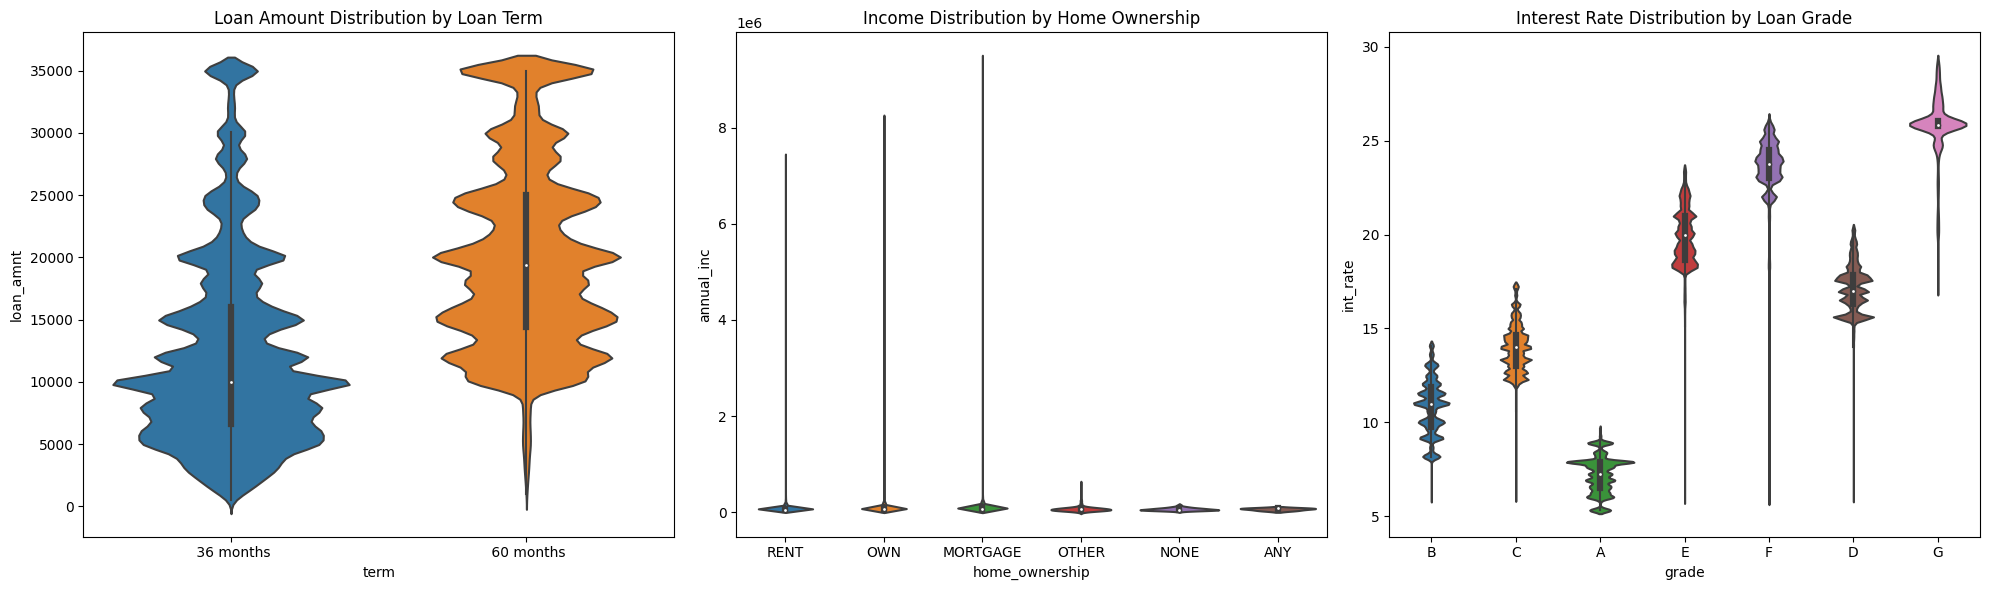

In [ ]:
plt.figure(figsize=(20, 6))

# Loan Amount Distribution by Loan Term
plt.subplot(131)
sns.violinplot(data=df, x='term', y='loan_amnt')
plt.title("Loan Amount Distribution by Loan Term")

# Income Distribution by Home Ownership
plt.subplot(132)
sns.violinplot(data=df, x='home_ownership', y='annual_inc')
plt.title("Income Distribution by Home Ownership")

# Interest Rate Distribution by Loan Grade
plt.subplot(133)
sns.violinplot(data=df, x='grade', y='int_rate')
plt.title("Interest Rate Distribution by Loan Grade")

plt.tight_layout()
plt.show()



1.   Loan Amount Distribution by Loan Term (Leftmost Plot):
  
  The leftmost violin plot shows the distribution of loan amounts based on the loan term (e.g., 36 months or 60 months).
You can observe that the 36-month loans have a wider distribution, indicating that there is more variability in loan amounts for this term.
The 60-month loans have a narrower distribution, which suggests that loan amounts for this term are more concentrated within a specific range.
It's also apparent that 36-month loans tend to have slightly higher loan amounts on average compared to 60-month loans.
2.   Income Distribution by Home Ownership (Middle Plot):

  The middle violin plot displays the distribution of annual income based on the type of home ownership.
You can see the income distribution for various categories, such as "OWN," "RENT," and "MORTGAGE."
It appears that "OWN" and "MORTGAGE" categories have relatively higher median incomes compared to the "RENT" category.
The width of the violin plot indicates the density of income distribution within each category.

3. Interest Rate Distribution by Loan Grade (Rightmost Plot):

  The rightmost violin plot illustrates the distribution of interest rates based on the loan grade (e.g., A, B, C, etc.).
You can observe that higher-grade loans (e.g., "A" and "B") generally have lower interest rates, while lower-grade loans (e.g., "E" and "F") have higher interest rates.
The width of each violin plot shows the distribution of interest rates for each loan grade.
The distribution within each grade provides insights into the variability in interest rates for borrowers with similar loan grades.



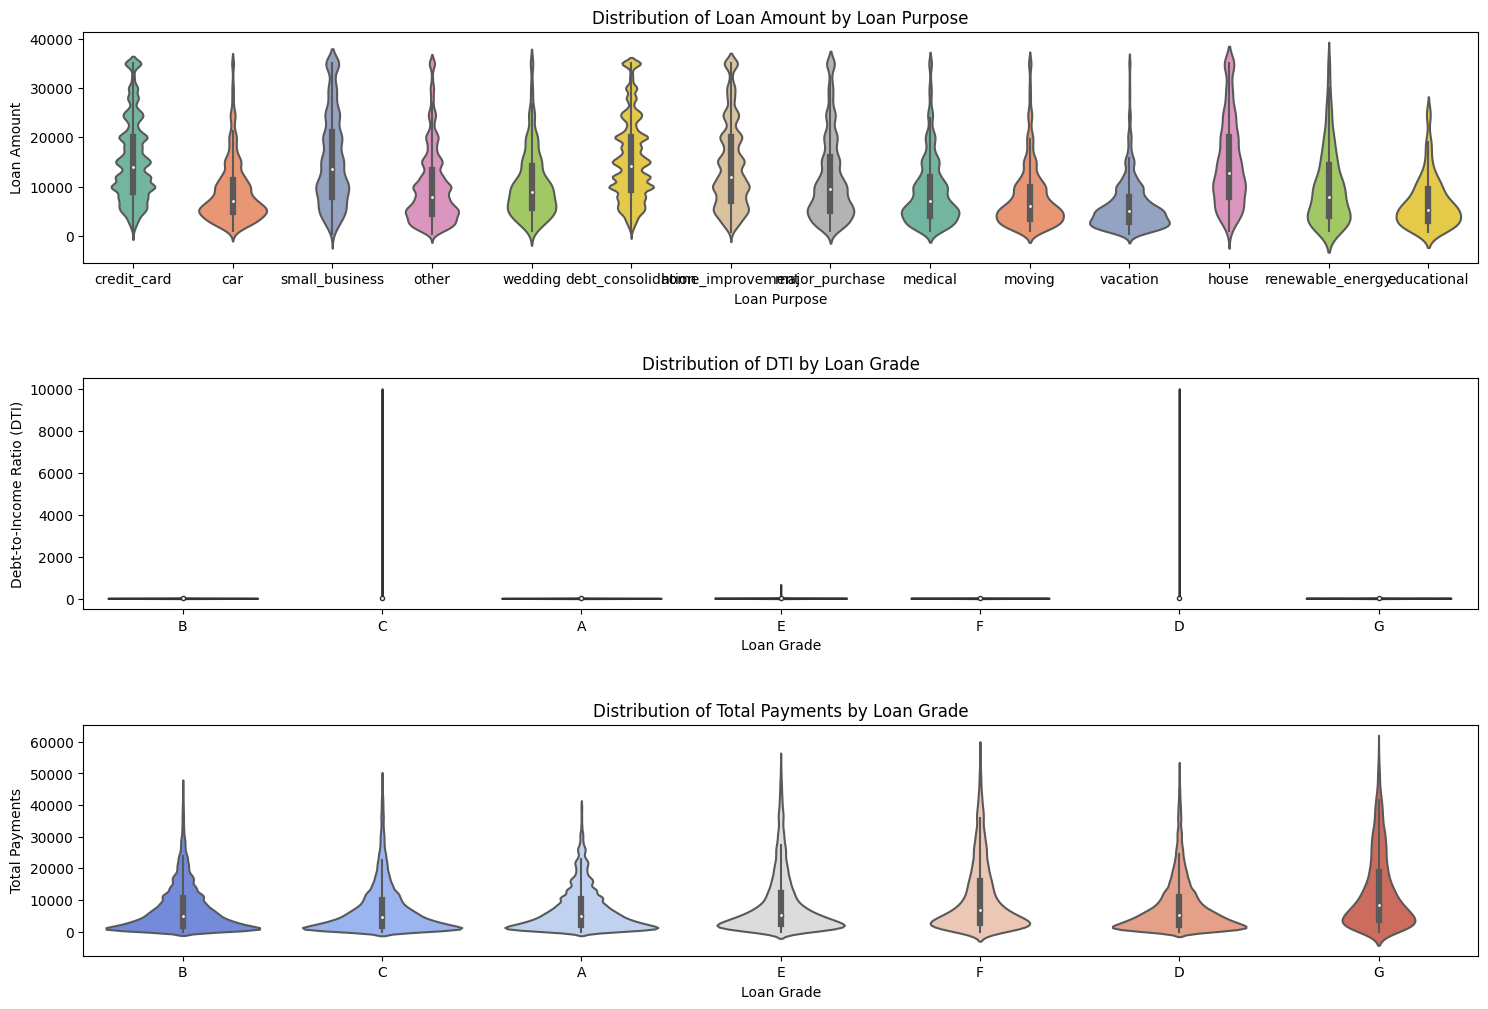

In [ ]:
# Categorical violin plots
fig, axes = plt.subplots(3, 1, figsize=(18, 12))
plt.subplots_adjust(hspace=0.5)

# Distribution of Loan Amount by Loan Purpose
sns.violinplot(data=df, x='purpose', y='loan_amnt', ax=axes[0], palette="Set2")
axes[0].set_title('Distribution of Loan Amount by Loan Purpose')
axes[0].set_xlabel('Loan Purpose')
axes[0].set_ylabel('Loan Amount')

# Distribution of Debt-to-Income Ratio (DTI) by Loan Grade
sns.violinplot(data=df, x='grade', y='dti', ax=axes[1], palette="viridis")
axes[1].set_title('Distribution of DTI by Loan Grade')
axes[1].set_xlabel('Loan Grade')
axes[1].set_ylabel('Debt-to-Income Ratio (DTI)')

# Distribution of Total Payments by Loan Grade
sns.violinplot(data=df, x='grade', y='total_pymnt', ax=axes[2], palette="coolwarm")
axes[2].set_title('Distribution of Total Payments by Loan Grade')
axes[2].set_xlabel('Loan Grade')
axes[2].set_ylabel('Total Payments')

plt.show()



1.   Distribution of Loan Amount by Loan Purpose:

  It visually represents the distribution of loan amounts for different loan purposes. Each violin plot corresponds to a specific loan purpose category, and the width of the violin at any point along the x-axis signifies the data density. The widest part of each violin plot highlights where the data is most concentrated, indicating that loans for certain purposes tend to be larger on average. Additionally, any outliers, which are data points lying outside the violin plots, represent loan amounts significantly different from the majority within a given loan purpose category, offering valuable insights for further analysis or risk assessment.
2.   Distribution of Debt-to-Income Ratio (DTI) by Loan Grade:

  This plot shows the distribution of debt-to-income ratios for different loan grades. Each violin plot represents a loan grade category.
The width and shape of the violins show how the DTI varies across loan grades. A wider section indicates higher data density.
You can identify whether certain loan grades have higher or lower median DTIs. If a grade has a narrower section at a specific DTI range, it suggests that DTIs are concentrated around that value for that grade.

3. Distribution of Total Payments by Loan Grade:

  This plot displays the distribution of total payments for different loan grades. Each violin plot corresponds to a loan grade category.
The width and shape of the violins reveal how total payments vary across different loan grades. A wider section indicates higher data density.
You can discern whether specific loan grades tend to have higher or lower total payments. A narrower section at a particular total payment value suggests that payments are concentrated around that value for that grade.


## PointPlots

### Pointplot for Funded Amount vs Funded Amount Invested

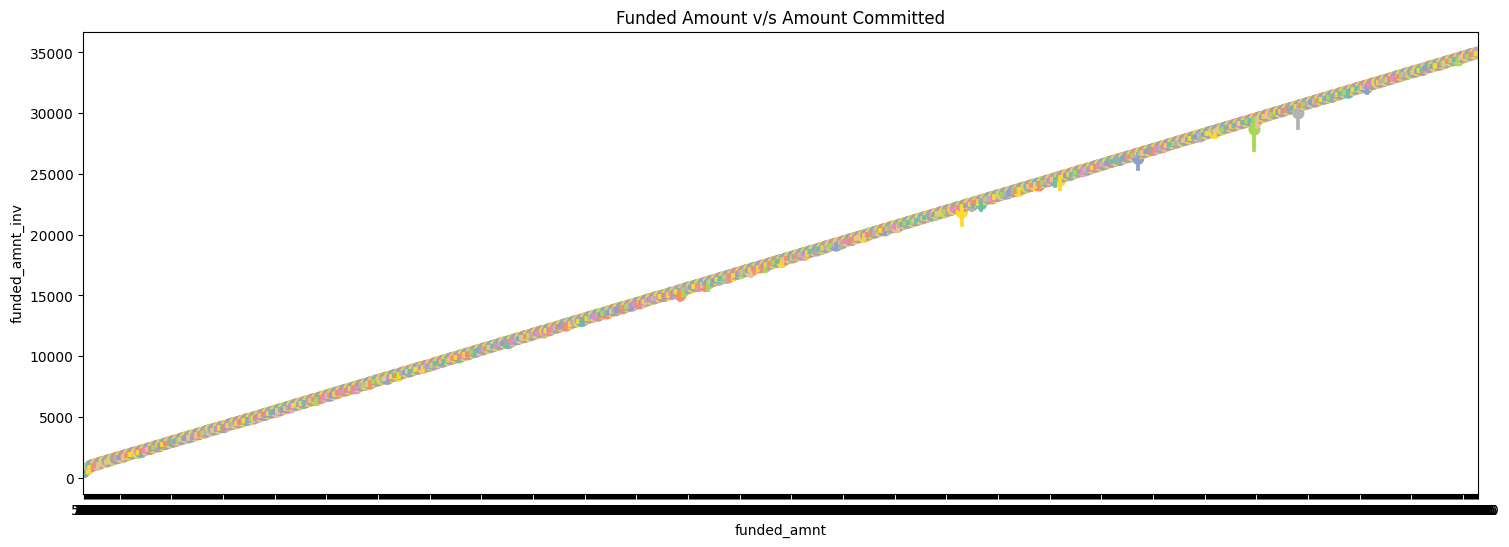

In [ ]:
plt.figure(figsize=(18,6))
sns.pointplot(x = "funded_amnt", y = "funded_amnt_inv",data=df, palette= sns.color_palette("Set2")).set(
    title="Funded Amount v/s Amount Committed");

The above point plot infers that the funded amount is directly proportional to the amount promised by the investors to be funded.

### Pointplot for multiple graphs
1. Term vs Loan Amount for different grade
2. Home Ownership vs Annual Income for different types of verification status
3. Grade vs Interest Rate for different types of purpose

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


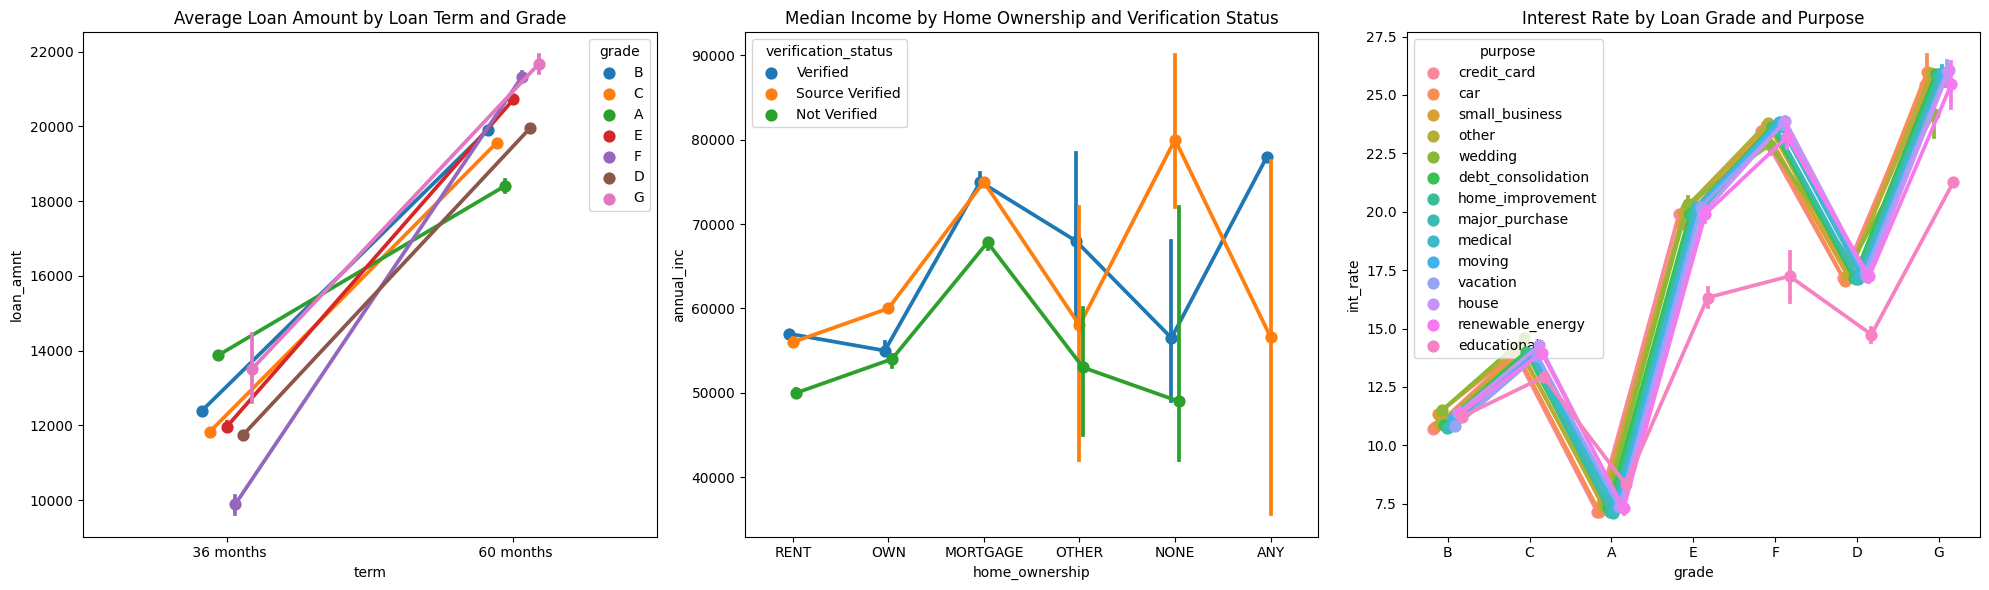

In [ ]:
plt.figure(figsize=(20, 6))

# Average Loan Amount by Loan Term and Grade
plt.subplot(131)
sns.pointplot(data=df, x='term', y='loan_amnt', hue='grade', dodge=True)
plt.title("Average Loan Amount by Loan Term and Grade")

# Median Income by Home Ownership and Verification Status
plt.subplot(132)
sns.pointplot(data=df, x='home_ownership', y='annual_inc', hue='verification_status', dodge=True, estimator=np.median)
plt.title("Median Income by Home Ownership and Verification Status")

# Interest Rate by Loan Grade and Purpose
plt.subplot(133)
sns.pointplot(data=df, x='grade', y='int_rate', hue='purpose', dodge=True)
plt.title("Interest Rate by Loan Grade and Purpose")

plt.tight_layout()
plt.show()



1.   Average Loan Amount by Loan Term and Grade:

  Longer-term loans (60 months) have higher average loan amounts than shorter-term loans (36 months).
Higher-grade loans (e.g., "A" or "B") tend to have higher average loan amounts within each loan term.
2.   Median Income by Home Ownership and Verification Status:

  Homeowners with verified incomes have higher median incomes compared to renters and those with different verification statuses.
3. Interest Rate by Loan Grade and Purpose:

  Higher-grade loans generally have lower interest rates.
Specific loan purposes (e.g., "credit_card" or "debt_consolidation") can result in slightly different interest rates within the same grade.



## Plots

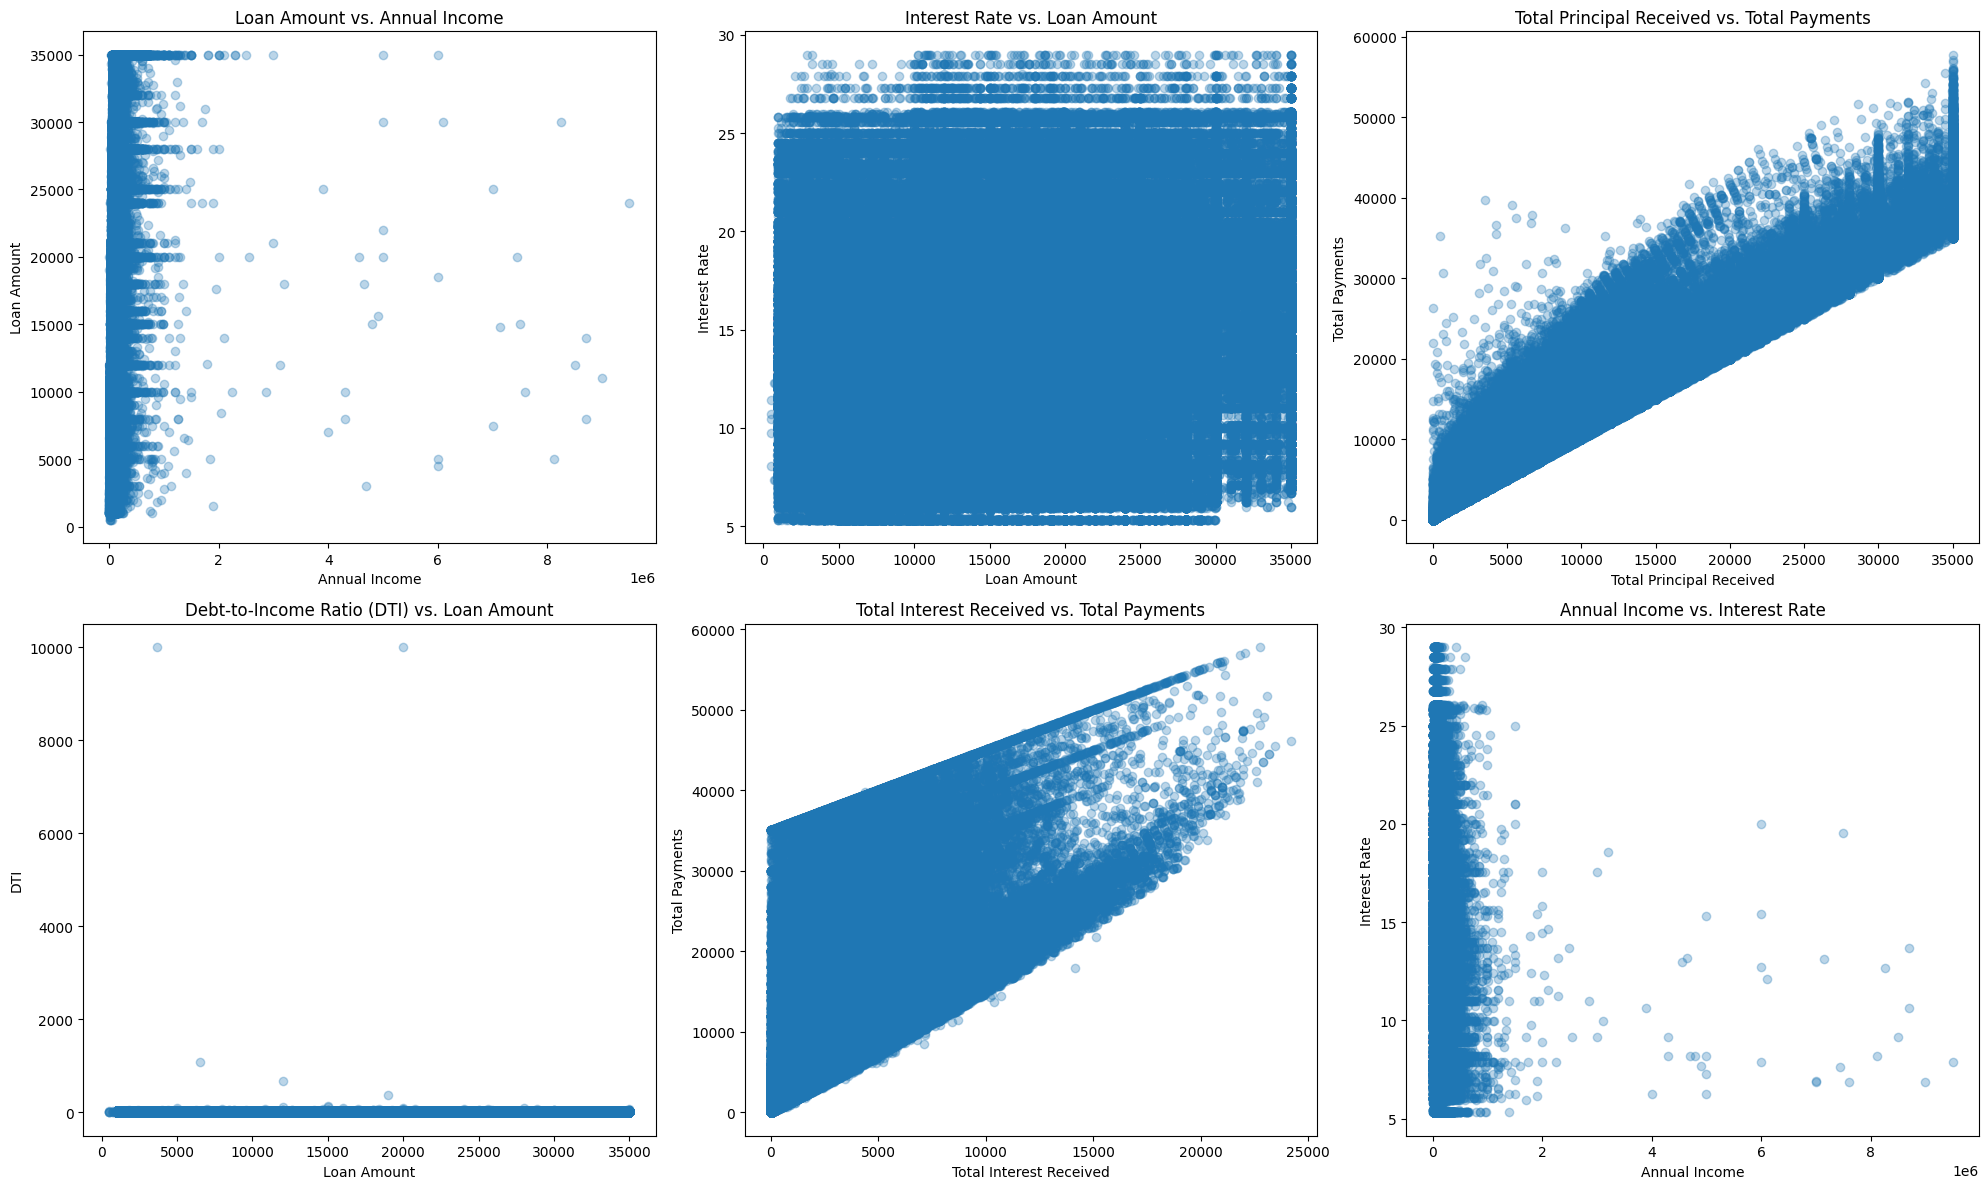

In [ ]:
plt.figure(figsize=(20, 12))

# Loan Amount vs. Annual Income
plt.subplot(231)
plt.scatter(df['annual_inc'], df['loan_amnt'], alpha=0.3)
plt.title("Loan Amount vs. Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")

# Interest Rate vs. Loan Amount
plt.subplot(232)
plt.scatter(df['loan_amnt'], df['int_rate'], alpha=0.3)
plt.title("Interest Rate vs. Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Interest Rate")

# Total Payments vs. Total Principal Received
plt.subplot(233)
plt.scatter(df['total_rec_prncp'], df['total_pymnt'], alpha=0.3)
plt.title("Total Principal Received vs. Total Payments")
plt.xlabel("Total Principal Received")
plt.ylabel("Total Payments")

# DTI vs. Loan Amount
plt.subplot(234)
plt.scatter(df['loan_amnt'], df['dti'], alpha=0.3)
plt.title("Debt-to-Income Ratio (DTI) vs. Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("DTI")

# Total Payments vs. Total Interest Received
plt.subplot(235)
plt.scatter(df['total_rec_int'], df['total_pymnt'], alpha=0.3)
plt.title("Total Interest Received vs. Total Payments")
plt.xlabel("Total Interest Received")
plt.ylabel("Total Payments")

# Annual Income vs. Interest Rate
plt.subplot(236)
plt.scatter(df['annual_inc'], df['int_rate'], alpha=0.3)
plt.title("Annual Income vs. Interest Rate")
plt.xlabel("Annual Income")
plt.ylabel("Interest Rate")

plt.tight_layout()
plt.show()



1.   Loan Amount vs. Annual Income:

  There is a positive correlation between annual income and loan amount, suggesting that individuals with higher annual incomes tend to qualify for larger loans.
2.   Interest Rate vs. Loan Amount:

  There may be a slight positive correlation between loan amount and interest rate, indicating that larger loans could be associated with slightly higher interest rates.
3. Total Principal Received vs. Total Payments:

  This plot shows the relationship between the total principal received and total payments. Ideally, you'd expect these values to be closely related, reflecting loan repayment. Any significant deviations could indicate issues with loan repayment or discrepancies.
4. Debt-to-Income Ratio (DTI) vs. Loan Amount:

  The plot displays the relationship between the debt-to-income ratio (DTI) and loan amount. It can help assess how borrowers' DTI impacts the loan amounts they receive.
5. Total Payments vs. Total Interest Received:

  This plot shows the relationship between the total payments and total interest received. It can help assess the proportion of payments allocated to interest payments and principal payments.
6. Annual Income vs. Interest Rate:

  There seems to be a lack of a clear linear relationship between annual income and interest rate, although it's possible that other factors or variables are at play in determining interest rates.

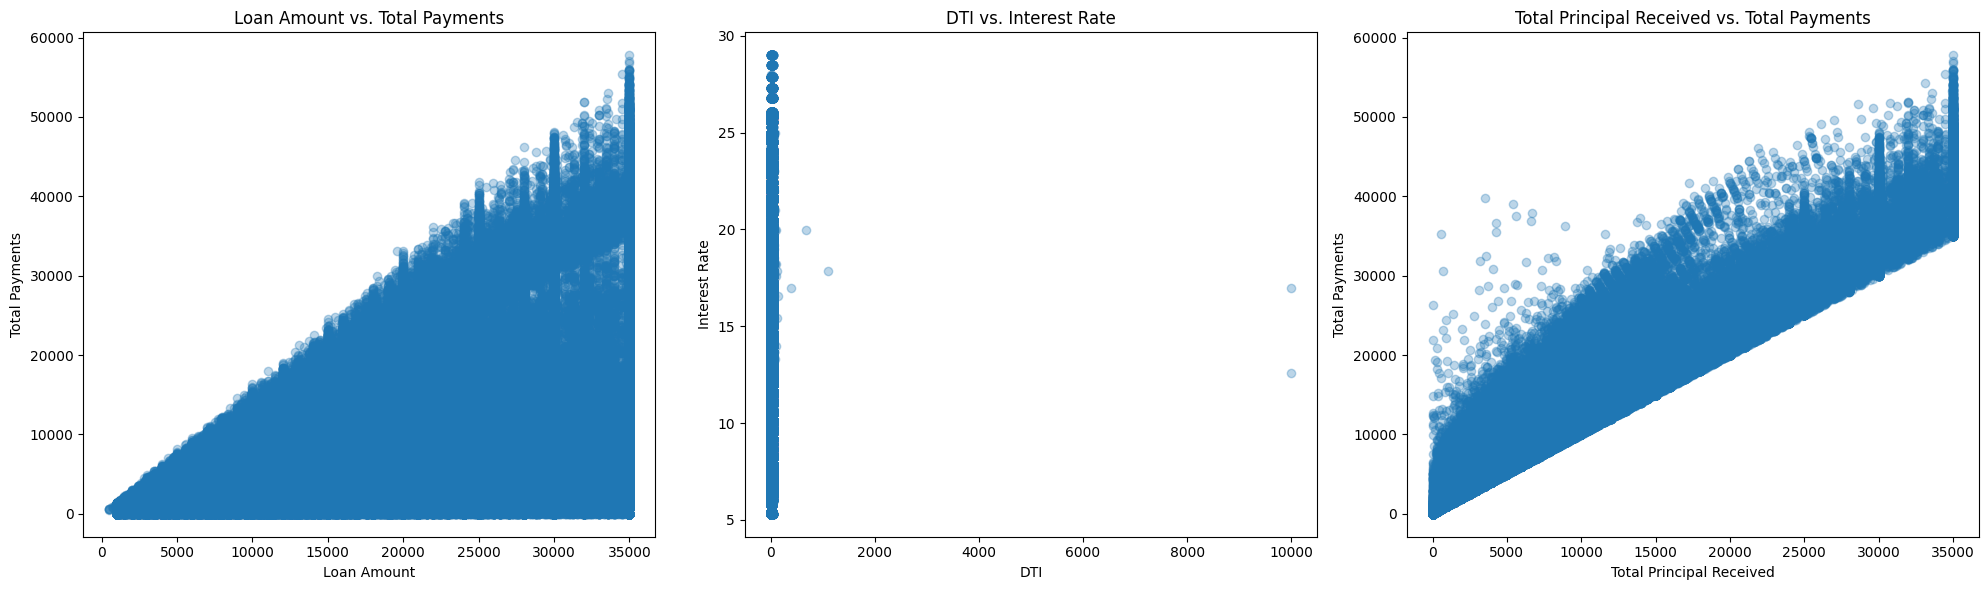

In [ ]:
plt.figure(figsize=(20, 6))

# Loan Amount vs. Total Payments
plt.subplot(131)
plt.scatter(df['loan_amnt'], df['total_pymnt'], alpha=0.3)
plt.title("Loan Amount vs. Total Payments")
plt.xlabel("Loan Amount")
plt.ylabel("Total Payments")

# DTI vs. Interest Rate
plt.subplot(132)
plt.scatter(df['dti'], df['int_rate'], alpha=0.3)
plt.title("DTI vs. Interest Rate")
plt.xlabel("DTI")
plt.ylabel("Interest Rate")

# Total Principal Received vs. Total Payments
plt.subplot(133)
plt.scatter(df['total_rec_prncp'], df['total_pymnt'], alpha=0.3)
plt.title("Total Principal Received vs. Total Payments")
plt.xlabel("Total Principal Received")
plt.ylabel("Total Payments")

plt.tight_layout()
plt.show()



1.   Loan Amount vs. Total Payments:

  This scatter plot shows the relationship between the loan amount and the total payments received.
The points are scattered, but there is a general positive correlation, indicating that higher loan amounts tend to result in higher total payments.
2.   DTI (Debt-to-Income Ratio) vs. Interest Rate:

  This scatter plot explores the relationship between a borrower's debt-to-income ratio (DTI) and the corresponding interest rate on their loan.
There doesn't seem to be a strong linear correlation, but you can see that there's some dispersion in interest rates for various DTI values. Lenders may consider other factors besides DTI when determining interest rates.

3. Total Principal Received vs. Total Payments:

  This scatter plot examines the relationship between the total principal received and the total payments made on loans.
There's a clear positive linear relationship, suggesting that as more principal is received, the total payments also increase, which is expected since payments include both principal and interest.



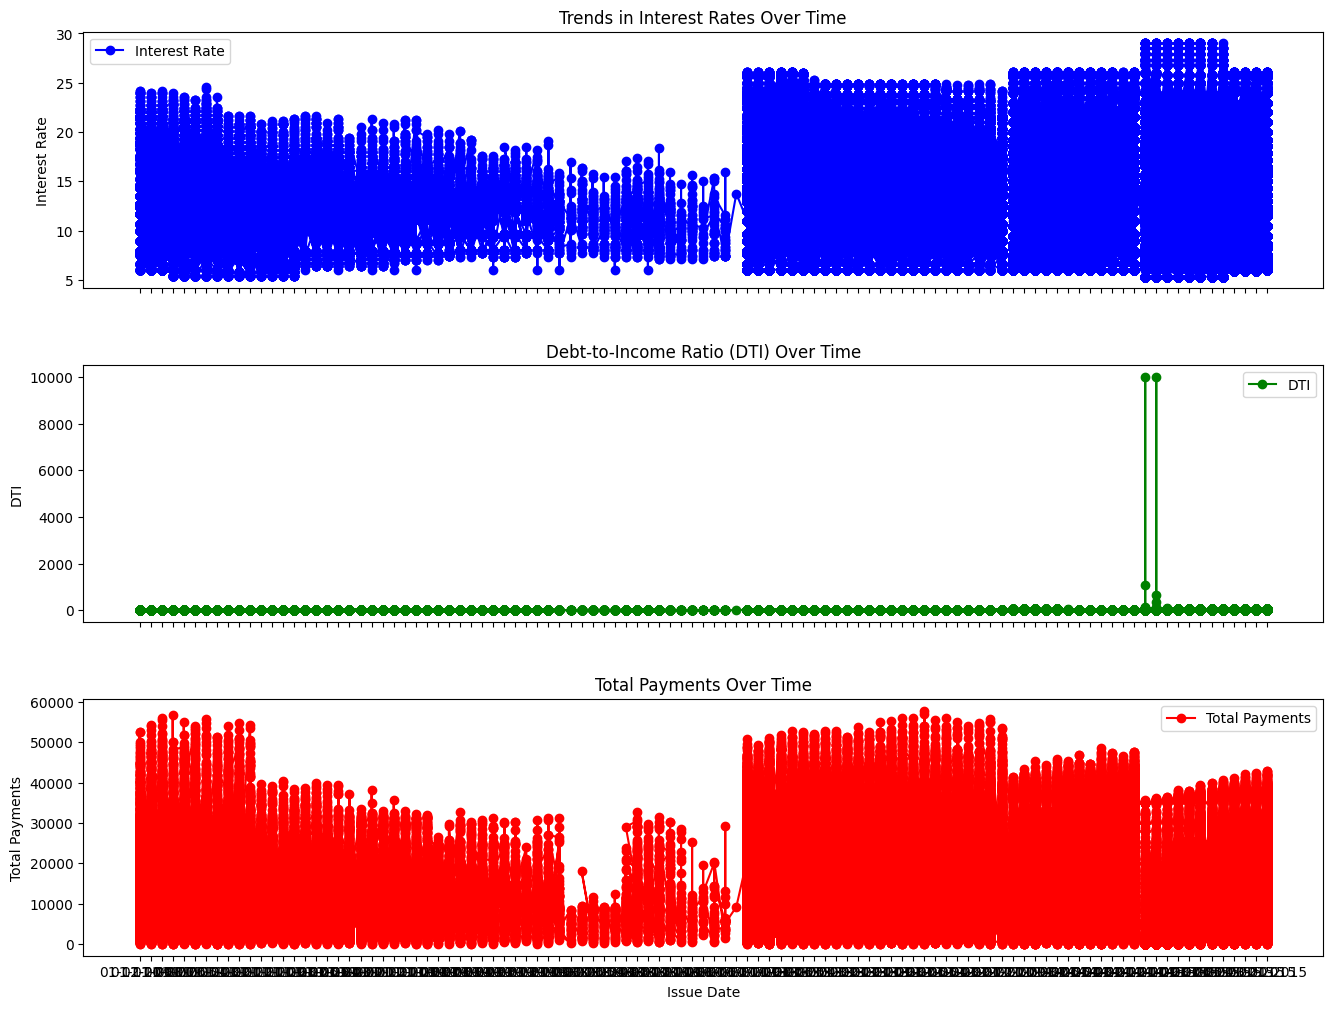

In [ ]:
# Creating Subplots for line charts
fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)
plt.subplots_adjust(hspace=0.3)

# Trends in Interest Rates Over Time
axes[0].plot(df['issue_d'], df['int_rate'], marker='o', color='b', label='Interest Rate')
axes[0].set_title('Trends in Interest Rates Over Time')
axes[0].set_ylabel('Interest Rate')
axes[0].legend()

# Debt-to-Income Ratio (DTI) Over Time
axes[1].plot(df['issue_d'], df['dti'], marker='o', color='g', label='DTI')
axes[1].set_title('Debt-to-Income Ratio (DTI) Over Time')
axes[1].set_ylabel('DTI')
axes[1].legend()

# Total Payments Over Time
axes[2].plot(df['issue_d'], df['total_pymnt'], marker='o', color='r', label='Total Payments')
axes[2].set_title('Total Payments Over Time')
axes[2].set_xlabel('Issue Date')
axes[2].set_ylabel('Total Payments')
axes[2].legend()

plt.show()



1.   Trends in Interest Rates Over Time:
  
  The first line chart shows the trends in interest rates over time. It appears that interest rates have fluctuated, with some periods of increase and decrease. This plot helps identify patterns and fluctuations in interest rates.
2.   Debt-to-Income Ratio (DTI) Over Time:
  
  The second line chart displays the debt-to-income ratio (DTI) over time. It appears that DTI has varied, indicating changes in borrowers' financial health. This plot helps assess the risk associated with borrowers' debt levels.
3. Total Payments Over Time:
  
  The third line chart illustrates the total payments made over time. It seems to show an upward trend, indicating that total payments have generally increased over time. This plot can be useful for understanding the growth in repayments made by borrowers.



<Figure size 2000x600 with 0 Axes>

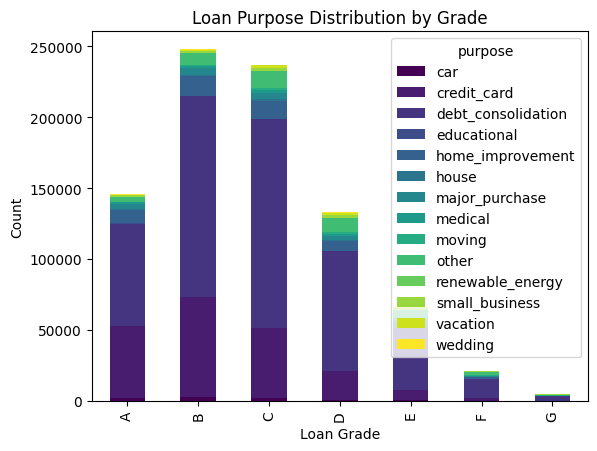

In [ ]:
plt.figure(figsize = (20,6))
data = {
    'grade': ['A', 'B', 'C', 'D', 'E', 'F','G'],
    'purpose': ['credit_card', 'car', 'small_business', 'other', 'wedding', 'debt_consolidation', 'home_improvement', 'major_purchase', 'medical', 'moving', 'vacation', 'house', 'reneable energy', 'educational']
}
ct = pd.crosstab(df['grade'], df['purpose'])

# Plot the stacked bar chart
ct.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Loan Purpose Distribution by Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')

plt.show()


This visualization provides a comprehensive view of how loan purposes are distributed across different loan grades, offering insights into borrower preferences, risk profiles, and lending strategies.

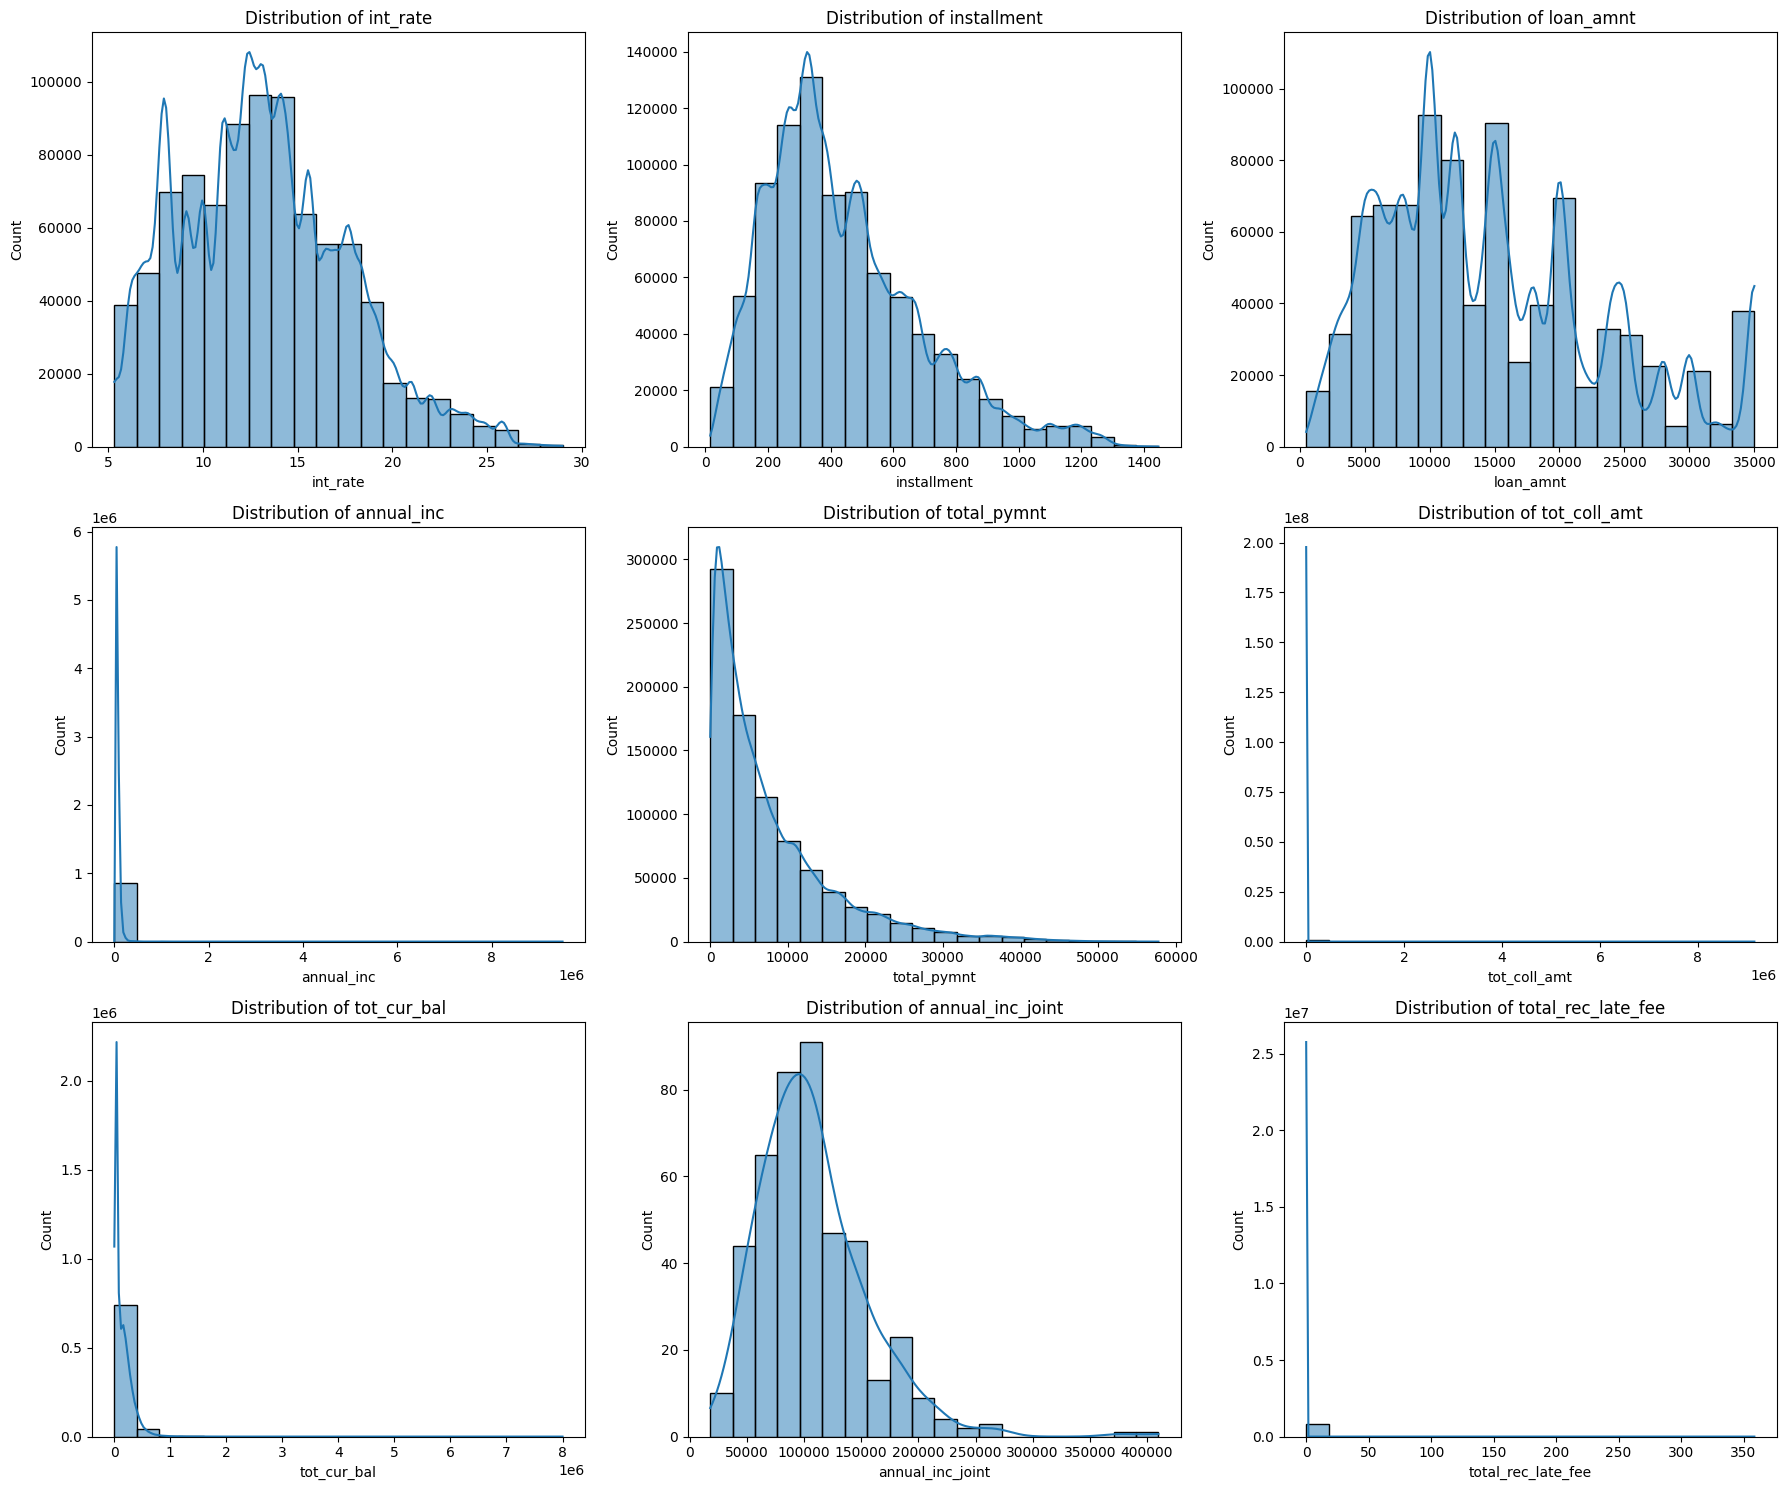

In [ ]:
col_names = ['int_rate', 'installment', 'loan_amnt', 'annual_inc', 'total_pymnt','tot_coll_amt','tot_cur_bal','annual_inc_joint','total_rec_late_fee']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(col_names):
    sns.histplot(df[col], ax=axes[i], kde=True, bins=20)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()



1.   int_rate: The distribution of interest rates appears to be slightly right-skewed, with most loans having interest rates in a specific range. There's a peak around a certain interest rate level.
2.   installment: The installment amount paid by borrowers follows a distribution with several peaks. This suggests that there are common installment amounts that borrowers tend to pay.
3. loan_amnt: The distribution of loan amounts is right-skewed, indicating that smaller loan amounts are more common, but there are also some larger loans in the dataset.
4. annual_inc: The distribution of annual income is right-skewed, with most borrowers having relatively lower incomes. However, there are some borrowers with significantly higher incomes.
5. total_pymnt: The distribution of total payments received is right-skewed, indicating that many borrowers fully repay their loans, but there are also instances of partial repayments or late payments.
6. tot_coll_amt: The distribution of total collection amounts has a peak at or near zero, suggesting that most borrowers have not been subject to collections.
7. tot_cur_bal: The distribution of total current balances is right-skewed, with most borrowers having lower balances, but some borrowers with larger balances.
8. annual_inc_joint: The distribution of joint annual incomes, if applicable, is similar to the individual annual income distribution but with fewer data points.
9. total_rec_late_fee: The distribution of total late fees received is right-skewed, with most borrowers not incurring late fees, but a few borrowers have paid significant late fees.



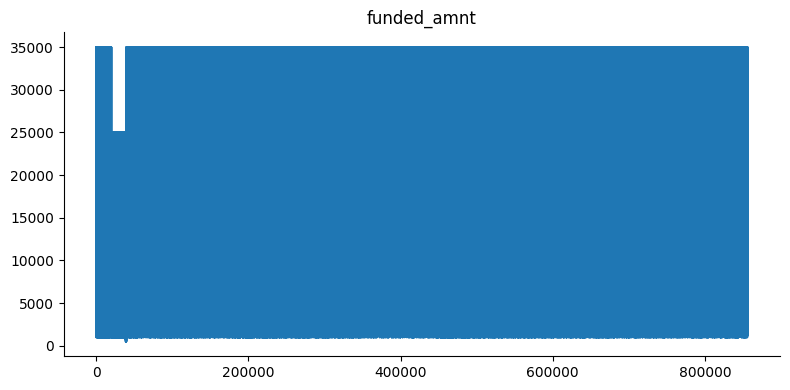

In [ ]:
df['funded_amnt'].plot(kind='line', figsize=(8, 4), title='funded_amnt')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()

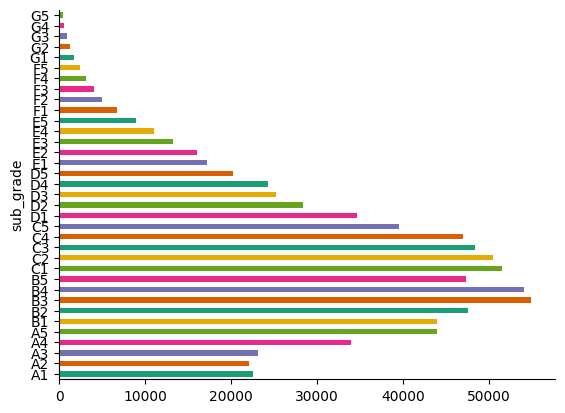

In [ ]:
df.groupby('sub_grade').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The above graph shows trends based on subgroups.

# Section 3: Data Preprocessing

* ## Removing the columns which have more than 15% NULL values



In [ ]:
df.shape

(855969, 73)

Before transformation number of columns in the dataframe is 73.

Removing the columns which have more than 15% NULL values of the whole column.

In [ ]:
#Calculate the percentage of non-null values in each column
non_null_percentages = df.count()/len(df) * 100

#defining a threshhold percentage
threshold_percentage = 85

columns_keep = non_null_percentages[non_null_percentages >=threshold_percentage].index
df_filtered = df[columns_keep]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          855969 non-null  int64  
 1   member_id                   855969 non-null  int64  
 2   loan_amnt                   855969 non-null  int64  
 3   funded_amnt                 855969 non-null  int64  
 4   funded_amnt_inv             855969 non-null  float64
 5   term                        855969 non-null  object 
 6   int_rate                    855969 non-null  float64
 7   installment                 855969 non-null  float64
 8   grade                       855969 non-null  object 
 9   sub_grade                   855969 non-null  object 
 10  emp_title                   806526 non-null  object 
 11  emp_length                  812908 non-null  object 
 12  home_ownership              855969 non-null  object 
 13  annual_inc    

In [ ]:
df_filtered.shape

(855969, 51)

After removing the excess NULL values columns we have 51 columns left in the dataframe which has less than 15% NULL values in whole column.

* ## Replacing NULL values

To replace NULL values in the remaining columns we can follow the given 2 rules:
1. If the data is continuous then replace it with mean of the column
2. If the data is categorical then replace it with mode of the column

Now checking how many NULL values are there in the dataframe

In [ ]:
print(df_filtered.isnull().sum())

print(f'\n\n In total there are {df_filtered.isnull().sum().sum()} NULL values in the dataframe')

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     49443
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
pymnt_plan                        0
purpose                           0
title                            33
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                   

Now applying the replacement

In [ ]:
for column in df_filtered.columns:
    if df_filtered[column].dtype == "object":
        mode_value = df_filtered[column].mode().values[0]
        df_filtered[column].fillna(mode_value, inplace=True)
    elif df_filtered[column].dtype in ("int64", "float64"):
        mean_value = df_filtered[column].mean()
        df_filtered[column].fillna(mean_value, inplace=True)


<ipython-input-49-3ce95c0df38a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column].fillna(mean_value, inplace=True)
<ipython-input-49-3ce95c0df38a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column].fillna(mode_value, inplace=True)
<ipython-input-49-3ce95c0df38a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column].fillna(mean_value, inplace=True)
<ipython-input-49-3ce95c0df38a>:5: Se

In [ ]:
print(df_filtered.isnull().sum())

print(f'\n\n In total there are {df_filtered.isnull().sum().sum()} NULL values in the dataframe after replacing NULL values')

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prnc

* ## Applying Categorical Encoding

Finding the columns which requires categorical encoding.

In [ ]:
object_columns = df_filtered.select_dtypes(include=['object']).columns

print(object_columns)

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')


Now, to distinguish between as a threshold we will choose number 12, if its greater than 12 we will apply label encoding, else we will apply one-hot encoding.

In [ ]:
cols_label =[]
cols_oh = []

for cols in object_columns:
    unique_count = len(df_filtered[cols].unique())

    if unique_count > 12:
        cols_label.append(cols)
    else:
        cols_oh.append(cols)

    print(f"Number of unique elements in '{cols}': {unique_count}")
    print("#"*30)

Number of unique elements in 'term': 2
##############################
Number of unique elements in 'grade': 7
##############################
Number of unique elements in 'sub_grade': 35
##############################
Number of unique elements in 'emp_title': 290910
##############################
Number of unique elements in 'emp_length': 11
##############################
Number of unique elements in 'home_ownership': 6
##############################
Number of unique elements in 'verification_status': 3
##############################
Number of unique elements in 'issue_d': 103
##############################
Number of unique elements in 'pymnt_plan': 2
##############################
Number of unique elements in 'purpose': 14
##############################
Number of unique elements in 'title': 60954
##############################
Number of unique elements in 'zip_code': 931
##############################
Number of unique elements in 'addr_state': 51
##############################
Number o

### Observation
* By observing, we can apply label encoding on subgrade, emp_title, issue_d, purpose, title, zip_code, addr_state, earliest_cr_line, last_payment_d, last_credit_pull_d.
* Rest of the columns can be encoded by using one-hot encoding.

In [ ]:
data = df_filtered.copy()

In [ ]:
# Apply one-hot encoding to columns in cols_oh
data = pd.get_dummies(data, columns=cols_oh)

# Apply label encoding to columns in cols_label
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cols_label:
    data[col] = label_encoder.fit_transform(data[col])

Checking the new dataframe shape

In [ ]:
print(data.shape)

df_filt = data.copy()

(855969, 78)


# Section 4 : Training the Model

Importing the libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, recall_score, precision_score, accuracy_score
from tensorflow import keras
import tensorflow as tf

## Classifier : Default Index Prediction

#### Applying PCA on the Dataframe for Default Index Prediction

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data.drop('default_ind', axis=1, inplace=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Creating a PCA model
pca = PCA(n_components=20)

# Fitting the PCA model to the standardized data
pca.fit(scaled_data)

# Getting the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# No. of components to retain based on explained variance
desired_variance = 0.95
cumulative_variance = 0
num_components_to_retain = 0

for explained_variance in explained_variance_ratios:
    cumulative_variance += explained_variance
    num_components_to_retain += 1
    if cumulative_variance >= desired_variance:
        break

pca = PCA(n_components=num_components_to_retain)
reduced_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=reduced_data, columns=[f'PC{i}' for i in range(1, num_components_to_retain + 1)])
# DataFrame with the reduced data

Checking the data

In [ ]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-2.765041,-2.012277,-0.033541,-0.711578,0.457785,0.368242,0.013844,1.881385,-1.301799,1.484271,...,-0.640886,0.009024,0.395636,0.223199,-0.180738,-0.144842,-0.108711,-0.205891,-0.002834,-0.305531
1,-3.096106,-2.736661,-3.311850,1.458833,1.371905,-0.247465,-0.057874,-0.803476,0.802676,-1.752121,...,-0.188836,-1.432023,-2.266181,0.275082,-1.398866,-0.429024,-0.220611,0.646103,-1.627020,0.530968
2,-3.899405,-2.926639,-2.253550,0.826663,-0.869419,-0.110340,0.018962,1.894835,-1.029733,0.691339,...,1.628650,0.085080,-0.556890,-0.273430,0.976059,0.196273,0.458180,0.056925,0.975247,0.068076
3,-1.150240,-3.067710,-0.513335,0.510870,0.034077,0.042733,0.042254,1.101183,0.954357,0.301858,...,1.100132,0.327603,-0.190277,-0.233985,0.096550,0.983658,0.939084,-0.152273,0.458159,0.640606
4,-2.390127,-1.295341,-1.110118,0.933318,-0.420951,-0.228554,0.070332,0.975315,1.467552,-2.117027,...,1.609148,0.938403,1.803898,2.202993,0.664902,-0.159321,0.336242,0.852408,-0.651828,1.098941


### Method : Logistic Regression

In [ ]:
X = pca_df
y = df['default_ind']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Applying Smote to resample in order to remove imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression Model
model_logistic = LogisticRegression()
model_logistic.fit(X_train_resampled, y_train_resampled)
y_pred_prob_logistic = model_logistic.predict_proba(X_test)[:, 1]
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_pred_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
y_pred_logistic = (y_pred_prob_logistic > 0.5).astype(int)
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

In [ ]:
cm_logistic

array([[153946,   7845],
       [  1004,   8399]])

### Method: ANN model

In [ ]:
# Building an ANN Model
keras = tf.keras
layers = keras.layers
EarlyStopping = keras.callbacks.EarlyStopping
model_ann = keras.Sequential([
    layers.Input(shape=(X_train_resampled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=[keras.metrics.Recall()])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history_ann = model_ann.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/100
20241/20241 [==============================] - 11s 509us/step - loss: 0.0839 - recall_6: 0.9655 - val_loss: 0.0461 - val_recall_6: 0.9401
Epoch 2/100
20241/20241 [==============================] - 10s 492us/step - loss: 0.0456 - recall_6: 0.9819 - val_loss: 0.0343 - val_recall_6: 0.9416
Epoch 3/100
20241/20241 [==============================] - 10s 495us/step - loss: 0.0384 - recall_6: 0.9855 - val_loss: 0.0370 - val_recall_6: 0.9628
Epoch 4/100
20241/20241 [==============================] - 10s 494us/step - loss: 0.0344 - recall_6: 0.9872 - val_loss: 0.0358 - val_recall_6: 0.9609
Epoch 5/100
20241/20241 [==============================] - 10s 492us/step - loss: 0.0314 - recall_6: 0.9887 - val_loss: 0.0379 - val_recall_6: 0.9713
Epoch 6/100
20241/20241 [==============================] - 10s 492us/step - loss: 0.0292 - recall_6: 0.9896 - val_loss: 0.0312 - val_recall_6: 0.9705
Epoch 7/100
20241/20241 [==============================] - 10s 493us/step - loss: 0.0270 - recall_6:

In [ ]:
# Model Evaluation and Visualization (ANN)
y_pred_prob_ann = model_ann.predict(X_test)
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_prob_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)
y_pred_ann = (y_pred_prob_ann > 0.5).astype(int)
cm_ann = confusion_matrix(y_test, y_pred_ann)

5350/5350 [==============================] - 1s 258us/step


In [ ]:
cm_ann

array([[160246,   1545],
       [   207,   9196]])

### Method : SVM
* Model - SVC
* Kernel - Linear, RBF
* C = 5
* Class_weight = {0:1, 1:10}
* gamma = scale

#### Kernel - Linear

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

x = pca_df
y = df_filtered['default_ind']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an SVC model
model = SVC(kernel='linear', class_weight={0: 1, 1: 10}, verbose=1)

# Train the model with early stopping
print("Training SVC model...\n")
model.fit(X_train, y_train)
print("Training complete.")

# Prediction
print("Making predictions on the test data...")
y_pred = model.predict(X_test)
print("Predictions complete.")

# Evaluation using recall and accuracy after early stopping
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Recall after early stopping:", recall)
print("Accuracy after early stopping:", accuracy)

Training SVC model...

[LibSVM].........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

#### Kernel - RBF

[LibSVM]......................................................................................................................................*......................................................*.*
optimization finished, #iter = 188449
obj = -103102.839701, rho = -1.042174
nSV = 70734, nBSV = 64081
Total nSV = 70734


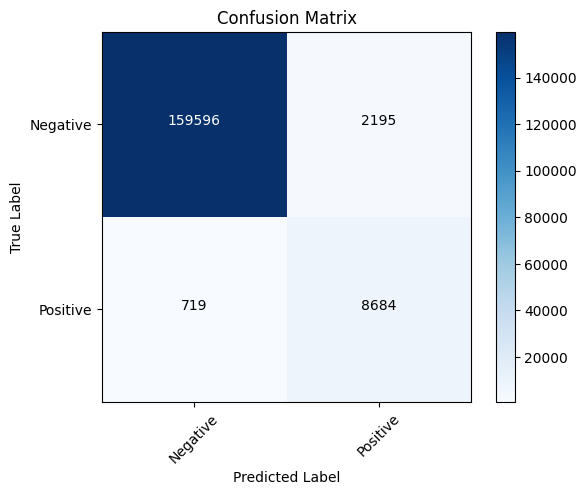

Recall: 0.9235350420078698


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, recall_score

X = pca_df
y = data_backup['default_ind']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVC model with adjusted parameters
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight={0:1, 1:10}, verbose=1)
svc_model.fit(X_train, y_train)

# Predict labels on the test data
y_pred = svc_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculating Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

### Method: SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score

n_samples = 300000

# Generating a random subset
random_indices = np.random.choice(X_train_resampled.shape[0], n_samples, replace=False)

X_train_resampled_subset = X_train_resampled[random_indices]
y_train_resampled_subset = y_train_resampled[random_indices]

# Hyperparameters for Grid Search

param_grid = {
    'loss': ['hinge'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.00001, 0.0001, 0.001],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-5, 1e-6, 1e-7],
}

sgd_model = SGDClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(estimator=sgd_model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train_resampled_subset, y_train_resampled_subset)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_sgd_model = grid_search.best_estimator_
best_sgd_model.set_params(max_iter=5000)
best_sgd_model.fit(X_train_resampled_subset, y_train_resampled_subset)

# Generate predictions
y_pred_prob_sgd = best_sgd_model.decision_function(X_test)

# Evaluation of model using recall
recall = recall_score(y_test, best_sgd_model.predict(X_test))
print("Recall:", recall)


/Users/dhruv_patel/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/dhruv_patel/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/dhruv_patel/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/dhruv_patel/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing ma

Best Hyperparameters: {'alpha': 1e-05, 'loss': 'log_loss', 'max_iter': 1000, 'penalty': 'l1', 'tol': 1e-05}
Recall: 0.904923960438158


In [ ]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, y_pred_prob_sgd)
roc_auc_sgd = auc(fpr_sgd, tpr_sgd)
y_pred_sgd = (y_pred_prob_sgd > 0.5).astype(int)
cm_sgd = confusion_matrix(y_test, y_pred_sgd)

In [ ]:
cm_sgd

array([[154415,   7376],
       [  1030,   8373]])

### Method: Random Forest

In [ ]:
# Random Forest Classifier Model
model_rf = RandomForestClassifier()
model_rf.fit(X_train_resampled, y_train_resampled)
y_pred_prob_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
y_pred_rf = (y_pred_prob_rf > 0.5).astype(int)
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [ ]:
cm_rf

array([[159652,   2139],
       [  2179,   7224]])

#### Final Result of the Models

In [ ]:

# Model Evaluation and Metrics
recall_ann = recall_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann)
accuracy_ann = accuracy_score(y_test, y_pred_ann)

recall_logistic = recall_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

recall_sgd = recall_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)


In [ ]:
recall_ann


0.9779857492289695

In [ ]:
recall_logistic


0.8932255663086249

In [ ]:
recall_rf

0.7682654471977028

In [ ]:
recall_sgd

0.8904604913325534

We observe that ANN model provides best recall score for default index classification wfollowed by SGD and Normal Logistic models.

## Classifier: Loan Term Prediction

#### Applying PCA on the Dataframe for Term prediciton of the Loan

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = df_filt.copy()

data.drop('term', axis=1, inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# PCA model
pca = PCA(n_components=20)
pca.fit(scaled_data)

explained_variance_ratios = pca.explained_variance_ratio_

# Determine the number of components to retain based on explained variance
desired_variance = 0.95
cumulative_variance = 0
num_components_to_retain = 0

for explained_variance in explained_variance_ratios:
    cumulative_variance += explained_variance
    num_components_to_retain += 1
    if cumulative_variance >= desired_variance:
        break

pca = PCA(n_components=num_components_to_retain)

reduced_data = pca.fit_transform(scaled_data)

# DataFrame with the reduced data
pca_df = pd.DataFrame(data=reduced_data, columns=[f'PC{i}' for i in range(1, num_components_to_retain + 1)])

Checking the data

In [ ]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-2.765041,-2.012277,-0.033541,-0.711578,0.457785,0.368242,0.013844,1.881385,-1.301799,1.484271,...,-0.640886,0.009024,0.395636,0.223199,-0.180738,-0.144842,-0.108711,-0.205891,-0.002834,-0.305531
1,-3.096106,-2.736661,-3.311850,1.458833,1.371905,-0.247465,-0.057874,-0.803476,0.802676,-1.752121,...,-0.188836,-1.432023,-2.266181,0.275082,-1.398866,-0.429024,-0.220611,0.646103,-1.627020,0.530968
2,-3.899405,-2.926639,-2.253550,0.826663,-0.869419,-0.110340,0.018962,1.894835,-1.029733,0.691339,...,1.628650,0.085080,-0.556890,-0.273430,0.976059,0.196273,0.458180,0.056925,0.975247,0.068076
3,-1.150240,-3.067710,-0.513335,0.510870,0.034077,0.042733,0.042254,1.101183,0.954357,0.301858,...,1.100132,0.327603,-0.190277,-0.233985,0.096550,0.983658,0.939084,-0.152273,0.458159,0.640606
4,-2.390127,-1.295341,-1.110118,0.933318,-0.420951,-0.228554,0.070332,0.975315,1.467552,-2.117027,...,1.609148,0.938403,1.803898,2.202993,0.664902,-0.159321,0.336242,0.852408,-0.651828,1.098941


### Method: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler


X = pca_df
y = data['term']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE()

# fit predictor and target variable
X_train_resampled, y_train_resampled  = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_resampled))  # Corrected to use y_smote

Original dataset shape Counter({0: 480192, 1: 204583})
Resample dataset shape Counter({0: 480192, 1: 480192})


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters
hyperparameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

# GridSearch
grid_search = GridSearchCV(LogisticRegression(class_weight={0:1,1:1}), hyperparameters, cv=5, verbose=2)

best_model = grid_search.fit(X_train_resampled, y_train_resampled )

# Print the best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# Using the best model to make predictions
y_pred_prob_logistic = best_model.predict_proba(X_test)[:, 1]
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_pred_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
y_pred_logistic = (y_pred_prob_logistic > 0.5).astype(int)
cm_logistic = confusion_matrix(y_test, y_pred_logistic)


Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.1s
[CV] END ................................C=0.001, penalty=l1; total time=   0.1s
[CV] END ................................C=0.001, penalty=l2; total time=   1.1s
[CV] END ................................C=0.001, penalty=l2; total time=   1.1s
[CV] END ................................C=0.001, penalty=l2; total time=   1.0s
[CV] END ................................C=0.001, penalty=l2; total time=   1.0s
[CV] END ................................C=0.001, penalty=l2; total time=   1.0s
[CV] END ........................C=0.001, penalty=elasticnet; total time=   0.0s
[CV] END ........................C=0.001, penal

c:\Users\DEVANSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
70 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DEVANSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DEVANSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\DEVAN

Best Penalty: l2
Best C: 1


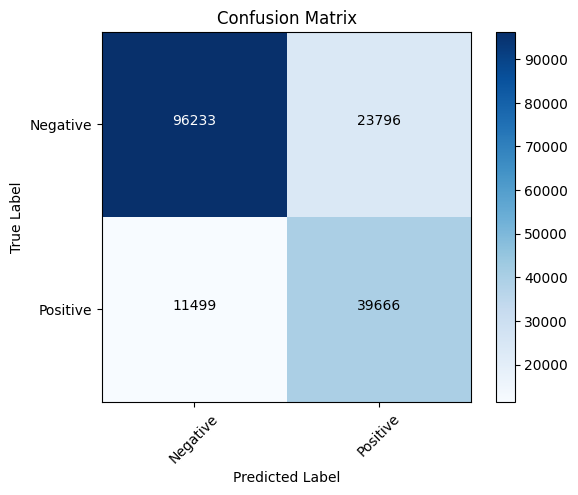

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
y_pred_prob = best_model.predict(X_test)

# Confusion Matrix
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# print precision, recall, and f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85    120029
           1       0.63      0.78      0.69     51165

    accuracy                           0.79    171194
   macro avg       0.76      0.79      0.77    171194
weighted avg       0.81      0.79      0.80    171194



### Method: ANN Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from collections import Counter
keras = tf.keras
layers = keras.layers
EarlyStopping = keras.callbacks.EarlyStopping

X = pca_df
y = data['term']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE()

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_resampled ))

Original dataset shape Counter({0: 480192, 1: 204583})
Resample dataset shape Counter({0: 480192, 1: 480192})


In [ ]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Build the ANN model
model = keras.Sequential([
    layers.Input(shape=(X_train_resampled.shape[1],)),  # Input layer
    layers.Dense(64, activation='selu'),
    layers.Dense(32,activation='selu'),
    layers.Dense(8,activation='selu'),
    layers.Dense(1, activation='sigmoid')    # Output layer sigmoid activation
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model with early stopping
history = model.fit(X_train_resampled, y_train_resampled , epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/100
15006/15006 [==============================] - 28s 2ms/step - loss: 0.2747 - accuracy: 0.8884 - val_loss: 0.2071 - val_accuracy: 0.9196
Epoch 2/100
15006/15006 [==============================] - 27s 2ms/step - loss: 0.1641 - accuracy: 0.9419 - val_loss: 0.1312 - val_accuracy: 0.9536
Epoch 3/100
15006/15006 [==============================] - 27s 2ms/step - loss: 0.1232 - accuracy: 0.9563 - val_loss: 0.1060 - val_accuracy: 0.9616
Epoch 4/100
15006/15006 [==============================] - 27s 2ms/step - loss: 0.1051 - accuracy: 0.9620 - val_loss: 0.0887 - val_accuracy: 0.9690
Epoch 5/100
15006/15006 [==============================] - 27s 2ms/step - loss: 0.0951 - accuracy: 0.9655 - val_loss: 0.0832 - val_accuracy: 0.9715
Epoch 6/100
15006/15006 [==============================] - 27s 2ms/step - loss: 0.0888 - accuracy: 0.9677 - val_loss: 0.1014 - val_accuracy: 0.9608
Epoch 7/100
15006/15006 [==============================] - 27s 2ms/step - loss: 0.0845 - accuracy: 0.9690 - val_

5350/5350 [==============================] - 6s 1ms/step


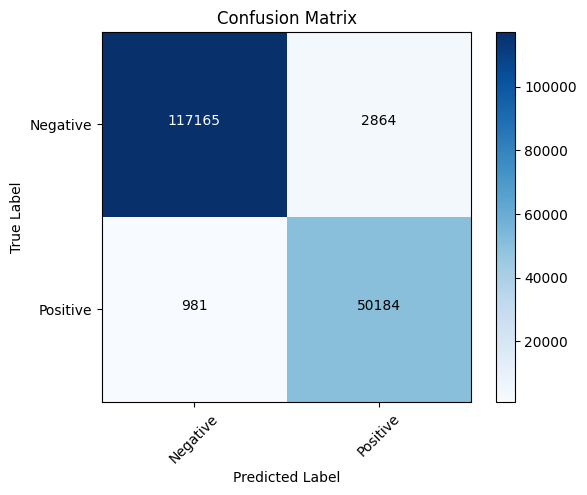

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    120029
           1       0.95      0.98      0.96     51165

    accuracy                           0.98    171194
   macro avg       0.97      0.98      0.97    171194
weighted avg       0.98      0.98      0.98    171194



### Method: SVM


#### Kernel - Linear

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

x = pca_df
y = df_filtered['term']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# SVC model
model = SVC(kernel='linear', class_weight='balanced', verbose=1)

# Training with early stopping
print("Training SVC model...\n")
model.fit(X_train, y_train)
print("Training complete.")

print("Making predictions on the test data...")
y_pred = model.predict(X_test)
print("Predictions complete.")

# Evaluation using recall and accuracy after early stopping
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Recall:", recall)
print("Accuracy:", accuracy)

Training SVC model...

[LibSVM].......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84     14070
           1       0.61      0.80      0.69      5930

    accuracy                           0.79     20000
   macro avg       0.76      0.79      0.76     20000
weighted avg       0.81      0.79      0.79     20000



#### Kernel - RBF

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

y = df_filtered['term']

# Selecting the first 1 lakh instances from pca_df and y
X_subset = pca_df[:100000]
y_subset = y[:100000]

X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

# SVC Model
model = SVC(kernel='rbf', gamma='scale', C=5, class_weight={0: 1, 1: 10})

# Training the model
print("Training SVC model...")
model.fit(X_train, y_train)
print("Training complete.")

print("Making predictions on the test data...")
y_pred = model.predict(X_test)
print("Predictions complete.")

# Evaluate the model using recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Training SVC model...
Training complete.
Making predictions on the test data...
Predictions complete.
Recall: 0.9154001098699872


### Method: XGBoost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler


X = pca_df
y = df_filtered['term']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE()

# fit predictor and target variable
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_resampled))  # Corrected to use y_smote

Original dataset shape Counter({0: 480192, 1: 204583})
Resample dataset shape Counter({0: 480192, 1: 480192})


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.5; total time=   1.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.5; total time=   1.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.75; total time=   1.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.75; total time=   1.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.75; total time=   1.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.75; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.75; total time=   1.4s
[CV] END lea

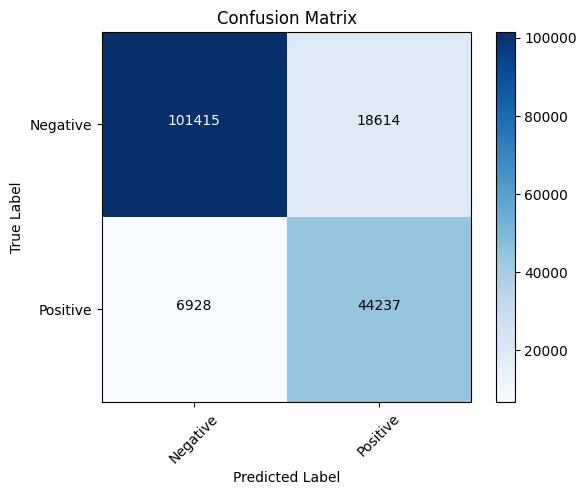

In [ ]:
# XGBoost for term prediction
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(random_state=42)

# Define the hyperparameters

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.75, 1.0],
}

# GridSearch
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, verbose=2)

best_model = grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])
print('Best subsample:', best_model.best_estimator_.get_params()['subsample'])
print('Best colsample_bytree:', best_model.best_estimator_.get_params()['colsample_bytree'])
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])

# Use the best model to make predictions
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89    120029
           1       0.70      0.86      0.78     51165

    accuracy                           0.85    171194
   macro avg       0.82      0.85      0.83    171194
weighted avg       0.87      0.85      0.85    171194



## Classifier: Interest Rate Prediction

### Applying PCA on the Dataframe for Interest Rate prediciton of the Loan

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

new_df = data.copy()

new_df.drop('int_rate',axis=1,inplace=True)

#exclude term column and send to scaler
data_standardized = scaler.fit_transform(new_df)

n_components = 15
pca = PCA(n_components=n_components)

# Fit and transform data with PCA
data_pca = pca.fit_transform(data_standardized)

data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i + 1}' for i in range(n_components)])

data_pca_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-2.874125,-0.691012,-0.126263,-0.924120,-1.204812,1.089731,1.533290,-1.263499,-0.365662,0.727506,-0.710130,1.991842,-0.924964,0.475135,-0.787337
1,-3.959038,-1.906808,-2.380064,2.092450,0.189151,0.747507,-1.197852,-1.236264,0.732582,-1.814906,-0.166892,-2.477790,-0.893455,-0.581118,-0.806442
2,-4.269175,-1.606490,-1.774848,-0.229806,0.908494,3.960445,-2.311920,-0.323143,0.715799,0.116141,0.910133,0.674088,0.603817,0.341008,0.463527
3,-1.368077,-2.267638,-0.383804,0.659040,1.051476,1.555430,-3.350275,-1.912220,2.009976,1.417357,1.613844,-0.217793,1.781540,-0.465946,0.130928
4,-2.854748,-0.195102,-0.046207,0.825024,1.863139,1.590197,-1.265206,-0.467061,1.503503,-0.012694,0.379250,1.565851,0.010580,-0.654408,-0.349129
5,-3.599910,-2.039137,0.434869,0.416190,0.669335,1.953367,-3.309741,-2.114635,1.409018,-0.606932,0.757106,0.130762,-0.146695,0.542248,0.172264
6,-1.880271,-0.741159,-1.466047,-0.722602,0.072983,1.344247,1.124298,0.717286,0.664961,0.097014,0.628225,-0.558690,0.161186,0.495932,-0.154042
7,-3.109089,-1.632894,-2.071646,-0.578339,-0.165828,1.271834,2.313473,-1.923025,-1.094211,-1.070216,0.024937,-1.399876,-0.987856,0.876315,-1.059979
8,-2.897913,-1.272181,-4.259006,2.365994,1.652276,1.768726,-1.198668,-2.453794,0.283432,-1.967801,0.257646,-0.861419,-0.716728,-0.673695,-0.569734
9,-3.497795,-0.908220,-2.020991,1.359875,-1.578657,1.224488,-0.209326,-0.039211,0.631928,-1.852115,1.051511,-0.634006,-0.427734,0.009533,-0.239112


In [ ]:
target = data['int_rate']
target = pd.cut(target, bins=[0, 10, 15, 25, 100], labels=['Low', 'Medium', 'High', 'Very High'])

# Convert the target labels to numeric
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from collections import Counter
keras = tf.keras
layers = keras.layers
EarlyStopping = keras.callbacks.EarlyStopping

# Applying SMOTE
X = data_pca_df
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE()

# Obtaining Resampled Data
x_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))  # Corrected to use y_smote

Original dataset shape Counter({2: 287392, 0: 207990, 1: 184643, 3: 4750})
Resample dataset shape Counter({2: 287392, 0: 287392, 1: 287392, 3: 287392})


### Method: ANN model

In [ ]:
scaler = StandardScaler()
x_smote = scaler.fit_transform(x_smote)
X_test = scaler.transform(X_test)
model = keras.Sequential([
    layers.Input(shape=(x_smote.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Using a learning rate schedule to get better results
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3, decay_steps=10000, decay_rate=0.9)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

# Compiling
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(x_smote, y_smote, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluation of model using accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/1000
35924/35924 [==============================] - 21s 573us/step - loss: 0.2436 - accuracy: 0.8962 - val_loss: 0.3121 - val_accuracy: 0.8638
Epoch 2/1000
35924/35924 [==============================] - 21s 591us/step - loss: 0.2051 - accuracy: 0.9123 - val_loss: 0.2740 - val_accuracy: 0.8797
Epoch 3/1000
35924/35924 [==============================] - 20s 564us/step - loss: 0.1910 - accuracy: 0.9182 - val_loss: 0.2537 - val_accuracy: 0.8892
Epoch 4/1000
35924/35924 [==============================] - 21s 591us/step - loss: 0.1822 - accuracy: 0.9221 - val_loss: 0.2485 - val_accuracy: 0.8915
Epoch 5/1000
35924/35924 [==============================] - 22s 606us/step - loss: 0.1761 - accuracy: 0.9248 - val_loss: 0.2482 - val_accuracy: 0.8916
Epoch 6/1000
35924/35924 [==============================] - 24s 676us/step - loss: 0.1724 - accuracy: 0.9265 - val_loss: 0.2469 - val_accuracy: 0.8932
Epoch 7/1000
35924/35924 [==============================] - 24s 666us/step - loss: 0.1694 - ac

### Method: XGBoost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter


# Create and train the XGBoost classifier
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y)),
    learning_rate=0.01,
    max_depth=10,
    n_estimators=500,
    min_child_weight=1,
    subsample=0.8,
    gamma=0.2,
    colsample_bytree=0.8
)
xgb_model.fit(x_smote, y_smote)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 0.8495215953830157
Confusion Matrix:
[[44911    17  5042  2127]
 [   18 40585  5336     0]
 [ 5926  7154 58909     1]
 [  140     0     0  1028]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     52097
           1       0.85      0.88      0.87     45939
           2       0.85      0.82      0.83     71990
           3       0.33      0.88      0.48      1168

    accuracy                           0.85    171194
   macro avg       0.73      0.86      0.76    171194
weighted avg       0.86      0.85      0.85    171194

